In [134]:
import pandas as pd
import numpy as np
import requests
import us
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import us
from sklearn.linear_model import LinearRegression
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import json

In [135]:
url = "https://github.com/farhodibr/CUNY-SPS-MSDS/blob/main/DATA608/PROJECT6/data/MMG2025_2019-2023_Data_To_Share.xlsx?raw=1"

states_feed_america_df = pd.read_excel(url, sheet_name="State")
states_feed_america_df.head()


,FIPS,State Name,State,Year,Overall Food Insecurity Rate,# of Food Insecure Persons Overall,Food Insecurity Rate among Black Persons (all ethnicities),Food Insecurity Rate among Hispanic Persons (any race),"Food Insecurity Rate among White, non-Hispanic Persons",SNAP Threshold in State,...,Senior Food Insecurity Rate,# of Food Insecure Seniors,Older Adult Food Insecurity Rate,# of Food Insecure Older Adults,Cost Per Meal,Weighted weekly $ needed by FI,Weighted Annual Food Budget Shortfall,Census Division,Census Region,FNS Region
0,1,Alabama,AL,2019,0.161,788250,0.27,0.13,0.12,1.3,...,0.094,105776.000000,0.156,105533.000000,3.01,16.96,405611000,East South Central,South,Southeast
1,1,Alabama,AL,2020,0.145,711370,0.27,0.14,0.10,1.3,...,0.090,104269.000000,0.142,97677.000000,3.13,16.62,358615000,East South Central,South,Southeast
2,1,Alabama,AL,2021,0.148,746550,0.26,0.12,0.10,1.3,...,0.089,103567.000000,0.144,100289.000000,3.50,20.36,461137000,East South Central,South,Southeast
3,1,Alabama,AL,2022,0.174,884270,0.31,0.18,0.12,1.3,...,0.092,109300.000000,0.134,87500.000000,3.91,24.24,650301000,East South Central,South,Southeast
4,1,Alabama,AL,2023,0.175,896510,0.31,0.19,0.13,1.3,...,0.081,103465.032349,0.108,62405.390503,3.50,21.84,594027000,East South Central,South,Southeast


In [136]:
rename_cols = {
    "FIPS": "fips",
    "State Name": "state_name",
    "State": "state",
    "Year": "year",
    "Overall Food Insecurity Rate": "fi_rate",
    "# of Food Insecure Persons Overall": "fi_count",
    "Food Insecurity Rate among Black Persons (all ethnicities)": "fi_black",
    "Food Insecurity Rate among Hispanic Persons (any race)": "fi_hispanic",
    "Food Insecurity Rate among White, non-Hispanic Persons": "fi_white",
    "SNAP Threshold in State": "snap_threshold",
    "% FI ≤ SNAP Threshold": "pct_fi_below_snap",
    "% FI > SNAP Threshold": "pct_fi_above_snap",
    "Child Food Insecurity Rate": "fi_children_rate",
    "# of Food Insecure Children": "fi_children_count",
    "% food insecure Children in HH w/HH Incomes Below 185 FPL": "pct_children_fi_below_185",
    "% food insecure Children in HH w/HH Incomes Above 185 FPL": "pct_children_fi_above_185",
    "Senior Food Insecurity Rate": "fi_senior_rate",
    "# of Food Insecure Seniors": "fi_senior_count",
    "Older Adult Food Insecurity Rate": "fi_older_rate",
    "# of Food Insecure Older Adults": "fi_older_count",
    "Cost Per Meal": "cost_per_meal",
    "Weighted weekly $ needed by FI": "weekly_shortfall",
    "Weighted Annual Food Budget Shortfall": "annual_shortfall",
    "Census Division": "census_division",
    "Census Region": "census_region",
    "FNS Region": "fns_region"
}

feed_america_clean = states_feed_america_df.rename(columns=rename_cols)
feed_america_clean.head()


,fips,state_name,state,year,fi_rate,fi_count,fi_black,fi_hispanic,fi_white,snap_threshold,...,fi_senior_rate,fi_senior_count,fi_older_rate,fi_older_count,cost_per_meal,weekly_shortfall,annual_shortfall,census_division,census_region,fns_region
0,1,Alabama,AL,2019,0.161,788250,0.27,0.13,0.12,1.3,...,0.094,105776.000000,0.156,105533.000000,3.01,16.96,405611000,East South Central,South,Southeast
1,1,Alabama,AL,2020,0.145,711370,0.27,0.14,0.10,1.3,...,0.090,104269.000000,0.142,97677.000000,3.13,16.62,358615000,East South Central,South,Southeast
2,1,Alabama,AL,2021,0.148,746550,0.26,0.12,0.10,1.3,...,0.089,103567.000000,0.144,100289.000000,3.50,20.36,461137000,East South Central,South,Southeast
3,1,Alabama,AL,2022,0.174,884270,0.31,0.18,0.12,1.3,...,0.092,109300.000000,0.134,87500.000000,3.91,24.24,650301000,East South Central,South,Southeast
4,1,Alabama,AL,2023,0.175,896510,0.31,0.19,0.13,1.3,...,0.081,103465.032349,0.108,62405.390503,3.50,21.84,594027000,East South Central,South,Southeast


In [137]:
feed_america_clean.columns = (
    feed_america_clean.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("%", "pct")
        .str.replace("#", "count")
        .str.replace("/", "_")
        .str.replace("(", "")
        .str.replace(")", "")
        .str.replace(",", "")
)
rename_cols = {
    "overall_food_insecurity_rate": "fi_rate",
    "food_insecurity_rate_among_black_persons_all_ethnicities": "fi_black",
    "food_insecurity_rate_among_hispanic_persons_any_race": "fi_hispanic",
    "food_insecurity_rate_among_white_non-hispanic_persons": "fi_white",
    "child_food_insecurity_rate": "fi_children_rate",
    "senior_food_insecurity_rate": "fi_senior_rate",
    "older_adult_food_insecurity_rate": "fi_older_rate",
}
feed_america_clean = feed_america_clean.rename(columns=rename_cols)

feed_america_clean.head()
feed_america_clean.columns


Index(['fips', 'state_name', 'state', 'year', 'fi_rate', 'fi_count',
       'fi_black', 'fi_hispanic', 'fi_white', 'snap_threshold',
       'pct_fi_below_snap', 'pct_fi_above_snap', 'fi_children_rate',
       'fi_children_count', 'pct_children_fi_below_185',
       'pct_children_fi_above_185', 'fi_senior_rate', 'fi_senior_count',
       'fi_older_rate', 'fi_older_count', 'cost_per_meal', 'weekly_shortfall',
       'annual_shortfall', 'census_division', 'census_region', 'fns_region'],
      dtype='object')

In [138]:
url = "https://raw.githubusercontent.com/farhodibr/CUNY-SPS-MSDS/main/DATA608/PROJECT6/data/mapdata_1.xlsx"
usda_df = pd.read_excel(url, header=[0,1,2])
usda_df.head()

Prevalence of household food insecurity and very low food security by State, average 2021–23    \n  \
                                                                                               State   
                                                                                  Unnamed: 0_level_2   
0                                                NaN                                                   
1                                               U.S.                                                   
2                                                 AK                                                   
3                                                 AL                                                   
4                                                 AR                                                   

                                                                             \
  Number of households             Food insecurity                            
    Average 2021–20231 Interviewed                  Prevalence Prevalence.1   
0               Number      Number                     Percent          NaN   
1            132435000       93002                        12.2                
2               279000        1116                        10.4                
3              2090000        1831                        11.5                
4              1283000        1743                        18.9            *   

                                                                             
                     Very low food security                                  
    Margin of error2             Prevalence Prevalence.1   Margin of error2  
0  Percentage points                Percent          NaN  Percentage points  
1               0.22                    4.7                            0.14  
2                2.4                    5.3                            1.54  
3               2.32                    4.4                            1.18  
4               1.57                    6.7            *               0.96

In [139]:
usda_df.columns.tolist()

[('Prevalence of household food insecurity and very low food security by State, average 2021–23    \n',
  'State',
  'Unnamed: 0_level_2'),
 ('Prevalence of household food insecurity and very low food security by State, average 2021–23    \n',
  'Number of households',
  'Average 2021–20231'),
 ('Prevalence of household food insecurity and very low food security by State, average 2021–23    \n',
  'Number of households',
  'Interviewed'),
 ('Prevalence of household food insecurity and very low food security by State, average 2021–23    \n',
  'Food insecurity            ',
  'Prevalence'),
 ('Prevalence of household food insecurity and very low food security by State, average 2021–23    \n',
  'Food insecurity            ',
  'Prevalence.1'),
 ('Prevalence of household food insecurity and very low food security by State, average 2021–23    \n',
  'Food insecurity            ',
  'Margin of error2'),
 ('Prevalence of household food insecurity and very low food security by State, average

In [140]:
state_col = ('Prevalence of household food insecurity and very low food security by State, average 2021–23    \n',
             'State',
             'Unnamed: 0_level_2')

households_col = ('Prevalence of household food insecurity and very low food security by State, average 2021–23    \n',
                  'Number of households',
                  'Average 2021–20231')

interviewed_col = ('Prevalence of household food insecurity and very low food security by State, average 2021–23    \n',
                   'Number of households',
                   'Interviewed')

fi_rate_col = ('Prevalence of household food insecurity and very low food security by State, average 2021–23    \n',
               'Food insecurity            ',
               'Prevalence')

fi_moe_col = ('Prevalence of household food insecurity and very low food security by State, average 2021–23    \n',
              'Food insecurity            ',
              'Margin of error2')

vlfi_rate_col = ('Prevalence of household food insecurity and very low food security by State, average 2021–23    \n',
                 'Very low food security',
                 'Prevalence')

vlfi_moe_col = ('Prevalence of household food insecurity and very low food security by State, average 2021–23    \n',
                'Very low food security',
                'Margin of error2')

usda = usda_df[
    [state_col, households_col, interviewed_col, fi_rate_col, fi_moe_col, vlfi_rate_col, vlfi_moe_col]
].copy()

usda.columns = [
    "state", "households", "interviewed", "fi_rate", "fi_moe", "vlfi_rate", "vlfi_moe"
]

usda = usda.iloc[1:]

for col in ["households", "interviewed", "fi_rate", "fi_moe", "vlfi_rate", "vlfi_moe"]:
    usda[col] = pd.to_numeric(usda[col], errors="coerce")

usda = usda[usda["state"].astype(str).str.len() == 2].reset_index(drop=True)

usda.head()

,state,households,interviewed,fi_rate,fi_moe,vlfi_rate,vlfi_moe
0,AK,279000.0,1116.0,10.4,2.40,5.3,1.54
1,AL,2090000.0,1831.0,11.5,2.32,4.4,1.18
2,AR,1283000.0,1743.0,18.9,1.57,6.7,0.96
3,AZ,2962000.0,1393.0,11.8,1.67,4.7,0.99
4,CA,14040000.0,8019.0,11.4,0.73,4.1,0.46


In [141]:
import pandas as pd
import requests

YEARS = [2019, 2020, 2021, 2022, 2023]
VARS = [
    "S1701_C03_001E",
    "S1701_C03_012E",
    "S1701_C03_013E",
    "S1701_C03_028E",
    "S1701_C03_038E",
    "S1701_C03_049E"
]

all_years = []

for yr in YEARS:
    print(f"Fetching {yr}...")
    url = f"https://api.census.gov/data/{yr}/acs/acs1/subject"
    params = {
        "get": "NAME," + ",".join(VARS),
        "for": "state:*"
    }

    resp = requests.get(url, params=params)

    # If not valid JSON → skip or use ACS5
    try:
        data = resp.json()
    except:
        print(f"❌ {yr} 1-year ACS unavailable. Will use ACS 5-year instead.")
        url = f"https://api.census.gov/data/{yr}/acs/acs5/subject"
        resp = requests.get(url, params=params)
        try:
            data = resp.json()
        except:
            print(f"⚠️ Failed again for {yr}. Skipping.")
            continue

    df = pd.DataFrame(data[1:], columns=data[0])
    df["year"] = yr
    all_years.append(df)

poverty = pd.concat(all_years, ignore_index=True)
poverty.head()


Fetching 2019...
Fetching 2020...
❌ 2020 1-year ACS unavailable. Will use ACS 5-year instead.
Fetching 2021...
Fetching 2022...
Fetching 2023...


,NAME,S1701_C03_001E,S1701_C03_012E,S1701_C03_013E,S1701_C03_028E,S1701_C03_038E,S1701_C03_049E,state,year
0,Mississippi,19.6,21.6,12.1,8.9,-888888888,100.0,28,2019
1,Missouri,12.9,14.0,11.4,6.2,-888888888,97.6,29,2019
2,Montana,12.6,13.8,10.9,7.9,-888888888,100.0,30,2019
3,Nebraska,9.9,10.9,8.8,5.5,-888888888,100.0,31,2019
4,Nevada,12.5,13.7,11.0,5.9,-888888888,100.0,32,2019


In [142]:
poverty = poverty.rename(columns={
    "NAME": "state_name",
    "S1701_C03_001E": "poverty_total",
    "S1701_C03_012E": "poverty_men",
    "S1701_C03_013E": "poverty_women",
    "S1701_C03_028E": "poverty_children",
    "S1701_C03_038E": "poverty_18_64",
    "S1701_C03_049E": "poverty_65plus"
})

poverty.head(100)

,state_name,poverty_total,poverty_men,poverty_women,poverty_children,poverty_18_64,poverty_65plus,state,year
0,Mississippi,19.6,21.6,12.1,8.9,-888888888,100.0,28,2019
1,Missouri,12.9,14.0,11.4,6.2,-888888888,97.6,29,2019
2,Montana,12.6,13.8,10.9,7.9,-888888888,100.0,30,2019
3,Nebraska,9.9,10.9,8.8,5.5,-888888888,100.0,31,2019
4,Nevada,12.5,13.7,11.0,5.9,-888888888,100.0,32,2019
...,...,...,...,...,...,...,...,...,...
95,Minnesota,9.3,10.2,7.1,4.8,-888888888,98.1,27,2020
96,Iowa,11.1,12.3,9.8,6.1,-888888888,100.0,19,2020
97,New Mexico,18.6,19.7,16.1,9.3,-888888888,100.0,35,2020
98,Nevada,12.8,13.9,10.7,5.9,-888888888,98.4,32,2020


In [143]:
poverty.state_name.unique()

array(['Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Vermont', 'Utah', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico', 'Georgia',
       'Idaho', 'Hawaii', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Connecticut', 'Florida', 'Alabama',
       'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Delaware', 'District of Columbia'], dtype=object)

In [144]:
poverty["state"] = (
    poverty["state"]
    .astype(str)
    .str.zfill(2)
    .apply(lambda x: us.states.lookup(x).abbr if us.states.lookup(x) else None)
)
poverty.head()

,state_name,poverty_total,poverty_men,poverty_women,poverty_children,poverty_18_64,poverty_65plus,state,year
0,Mississippi,19.6,21.6,12.1,8.9,-888888888,100.0,MS,2019
1,Missouri,12.9,14.0,11.4,6.2,-888888888,97.6,MO,2019
2,Montana,12.6,13.8,10.9,7.9,-888888888,100.0,MT,2019
3,Nebraska,9.9,10.9,8.8,5.5,-888888888,100.0,NE,2019
4,Nevada,12.5,13.7,11.0,5.9,-888888888,100.0,NV,2019


In [145]:
fa = feed_america_clean   
master = fa.merge(usda, on="state", how="left", suffixes=("", "_usda"))
master = master.merge(poverty, on="state", how="left", suffixes=("", "_poverty"))
numeric_cols = master.select_dtypes(include=["float64", "int64"]).columns.tolist()

for col in numeric_cols:
    master[col] = pd.to_numeric(master[col], errors="coerce")

master = master.sort_values(["state", "year"]).reset_index(drop=True)
master.head()

,fips,state_name,state,year,fi_rate,fi_count,fi_black,fi_hispanic,fi_white,snap_threshold,...,vlfi_rate,vlfi_moe,state_name_poverty,poverty_total,poverty_men,poverty_women,poverty_children,poverty_18_64,poverty_65plus,year_poverty
0,2,Alaska,AK,2019,0.119,86970,0.18,0.14,0.09,1.3,...,5.3,1.54,Alaska,10.1,11.1,6.8,4.5,-888888888,100.0,2019.0
1,2,Alaska,AK,2019,0.119,86970,0.18,0.14,0.09,1.3,...,5.3,1.54,Alaska,10.3,11.1,7.2,4.7,-888888888,99.4,2020.0
2,2,Alaska,AK,2019,0.119,86970,0.18,0.14,0.09,1.3,...,5.3,1.54,Alaska,10.5,10.7,7.6,5.0,-888888888,68.1,2021.0
3,2,Alaska,AK,2019,0.119,86970,0.18,0.14,0.09,1.3,...,5.3,1.54,Alaska,11.0,11.8,7.7,4.7,-888888888,96.6,2022.0
4,2,Alaska,AK,2019,0.119,86970,0.18,0.14,0.09,1.3,...,5.3,1.54,Alaska,10.4,10.6,7.3,5.4,-888888888,100.0,2023.0


In [146]:
master = master.drop(columns=["state_name_poverty"])

ordered_cols = [
    "state", "state_name", "year",
    "fi_rate", "fi_count", "fi_children_rate", "fi_children_count",
    "fi_senior_rate", "fi_senior_count",
    "fi_older_rate", "fi_older_count",
    "fi_black", "fi_hispanic", "fi_white",
    "snap_threshold", "cost_per_meal",
    "weekly_shortfall", "annual_shortfall",
    "fips", "census_region", "census_division",
    "households", "interviewed", "fi_moe", "vlfi_rate", "vlfi_moe",
    "poverty_total", "poverty_men", "poverty_women",
    "poverty_children", "poverty_18_64", "poverty_65plus"
]

master = master[ ordered_cols ]

CENSUS_MISSING = {-666666666, -222222222, -888888888}

poverty_cols = [
    "poverty_total", "poverty_men", "poverty_women",
    "poverty_children", "poverty_18_64", "poverty_65plus"
]

for col in poverty_cols:
    master[col] = pd.to_numeric(master[col], errors="coerce")
    master[col] = master[col].replace(CENSUS_MISSING, pd.NA)



In [147]:
master.head()

,state,state_name,year,fi_rate,fi_count,fi_children_rate,fi_children_count,fi_senior_rate,fi_senior_count,fi_older_rate,...,interviewed,fi_moe,vlfi_rate,vlfi_moe,poverty_total,poverty_men,poverty_women,poverty_children,poverty_18_64,poverty_65plus
0,AK,Alaska,2019,0.119,86970,0.161,28850,0.067,8609.0,0.107,...,1116.0,2.4,5.3,1.54,10.1,11.1,6.8,4.5,<NA>,100.0
1,AK,Alaska,2019,0.119,86970,0.161,28850,0.067,8609.0,0.107,...,1116.0,2.4,5.3,1.54,10.3,11.1,7.2,4.7,<NA>,99.4
2,AK,Alaska,2019,0.119,86970,0.161,28850,0.067,8609.0,0.107,...,1116.0,2.4,5.3,1.54,10.5,10.7,7.6,5.0,<NA>,68.1
3,AK,Alaska,2019,0.119,86970,0.161,28850,0.067,8609.0,0.107,...,1116.0,2.4,5.3,1.54,11.0,11.8,7.7,4.7,<NA>,96.6
4,AK,Alaska,2019,0.119,86970,0.161,28850,0.067,8609.0,0.107,...,1116.0,2.4,5.3,1.54,10.4,10.6,7.3,5.4,<NA>,100.0


In [148]:

master = master.drop_duplicates(subset=["state", "year"])
master.to_csv("master_clean.csv", index=False)
master.head()

,state,state_name,year,fi_rate,fi_count,fi_children_rate,fi_children_count,fi_senior_rate,fi_senior_count,fi_older_rate,...,interviewed,fi_moe,vlfi_rate,vlfi_moe,poverty_total,poverty_men,poverty_women,poverty_children,poverty_18_64,poverty_65plus
0,AK,Alaska,2019,0.119,86970,0.161,28850,0.067,8609.000000,0.107,...,1116.0,2.4,5.3,1.54,10.1,11.1,6.8,4.5,<NA>,100.0
5,AK,Alaska,2020,0.108,79670,0.147,26910,0.059,7863.000000,0.117,...,1116.0,2.4,5.3,1.54,10.1,11.1,6.8,4.5,<NA>,100.0
10,AK,Alaska,2021,0.107,78260,0.128,22960,0.084,12149.000000,0.080,...,1116.0,2.4,5.3,1.54,10.1,11.1,6.8,4.5,<NA>,100.0
15,AK,Alaska,2022,0.128,93620,0.171,30110,0.075,11900.000000,0.070,...,1116.0,2.4,5.3,1.54,10.1,11.1,6.8,4.5,<NA>,100.0
20,AK,Alaska,2023,0.145,106080,0.178,31030,0.075,11566.404282,0.063,...,1116.0,2.4,5.3,1.54,10.1,11.1,6.8,4.5,<NA>,100.0


In [149]:
bad_values = [96.6, 99.4, 100.0, -666666666, -666666666.0]

poverty_cols = [
    'poverty_total','poverty_men','poverty_women',
    'poverty_children','poverty_18_64','poverty_65plus'
]

for col in poverty_cols:
    master[col] = master[col].replace(bad_values, np.nan)


In [150]:
master.groupby("state")["year"].nunique()
master.dtypes


state                 object
state_name            object
year                   int64
fi_rate              float64
fi_count               int64
fi_children_rate     float64
fi_children_count      int64
fi_senior_rate       float64
fi_senior_count      float64
fi_older_rate        float64
fi_older_count       float64
fi_black             float64
fi_hispanic          float64
fi_white             float64
snap_threshold       float64
cost_per_meal        float64
weekly_shortfall     float64
annual_shortfall       int64
fips                   int64
census_region         object
census_division       object
households           float64
interviewed          float64
fi_moe               float64
vlfi_rate            float64
vlfi_moe             float64
poverty_total        float64
poverty_men          float64
poverty_women        float64
poverty_children     float64
poverty_18_64         object
poverty_65plus        object
dtype: object

In [151]:
master.poverty_65plus.unique()

array([nan, 97.8, 89.9, 94.0, 98.0, 97.2, 97.6, 95.4, <NA>, 99.2, 99.3,
       90.5], dtype=object)

In [152]:
master.poverty_18_64 = pd.to_numeric(master.poverty_18_64, errors='coerce')
master.poverty_65plus = pd.to_numeric(master.poverty_65plus, errors='coerce')
master.dtypes

state                 object
state_name            object
year                   int64
fi_rate              float64
fi_count               int64
fi_children_rate     float64
fi_children_count      int64
fi_senior_rate       float64
fi_senior_count      float64
fi_older_rate        float64
fi_older_count       float64
fi_black             float64
fi_hispanic          float64
fi_white             float64
snap_threshold       float64
cost_per_meal        float64
weekly_shortfall     float64
annual_shortfall       int64
fips                   int64
census_region         object
census_division       object
households           float64
interviewed          float64
fi_moe               float64
vlfi_rate            float64
vlfi_moe             float64
poverty_total        float64
poverty_men          float64
poverty_women        float64
poverty_children     float64
poverty_18_64        float64
poverty_65plus       float64
dtype: object

In [153]:
master.head(100)

,state,state_name,year,fi_rate,fi_count,fi_children_rate,fi_children_count,fi_senior_rate,fi_senior_count,fi_older_rate,...,interviewed,fi_moe,vlfi_rate,vlfi_moe,poverty_total,poverty_men,poverty_women,poverty_children,poverty_18_64,poverty_65plus
0,AK,Alaska,2019,0.119,86970,0.161,28850,0.067,8609.000000,0.107,...,1116.0,2.40,5.3,1.54,10.1,11.1,6.8,4.5,NaN,NaN
5,AK,Alaska,2020,0.108,79670,0.147,26910,0.059,7863.000000,0.117,...,1116.0,2.40,5.3,1.54,10.1,11.1,6.8,4.5,NaN,NaN
10,AK,Alaska,2021,0.107,78260,0.128,22960,0.084,12149.000000,0.080,...,1116.0,2.40,5.3,1.54,10.1,11.1,6.8,4.5,NaN,NaN
15,AK,Alaska,2022,0.128,93620,0.171,30110,0.075,11900.000000,0.070,...,1116.0,2.40,5.3,1.54,10.1,11.1,6.8,4.5,NaN,NaN
20,AK,Alaska,2023,0.145,106080,0.178,31030,0.075,11566.404282,0.063,...,1116.0,2.40,5.3,1.54,10.1,11.1,6.8,4.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,MA,Massachusetts,2019,0.082,566930,0.090,121560,0.055,86935.000000,0.078,...,1897.0,1.28,3.2,0.73,9.4,10.3,7.5,3.8,NaN,NaN
460,MA,Massachusetts,2020,0.072,497250,0.088,119330,0.053,86887.000000,0.076,...,1897.0,1.28,3.2,0.73,9.4,10.3,7.5,3.8,NaN,NaN
465,MA,Massachusetts,2021,0.081,564030,0.084,113960,0.064,110664.000000,0.090,...,1897.0,1.28,3.2,0.73,9.4,10.3,7.5,3.8,NaN,NaN
470,MA,Massachusetts,2022,0.102,713870,0.127,169800,0.071,125200.000000,0.094,...,1897.0,1.28,3.2,0.73,9.4,10.3,7.5,3.8,NaN,NaN


In [154]:
master.poverty_65plus.unique()

array([ nan, 97.8, 89.9, 94. , 98. , 97.2, 97.6, 95.4, 99.2, 99.3, 90.5])

In [155]:
analysis_df = master.copy()
analysis_df.head()

,state,state_name,year,fi_rate,fi_count,fi_children_rate,fi_children_count,fi_senior_rate,fi_senior_count,fi_older_rate,...,interviewed,fi_moe,vlfi_rate,vlfi_moe,poverty_total,poverty_men,poverty_women,poverty_children,poverty_18_64,poverty_65plus
0,AK,Alaska,2019,0.119,86970,0.161,28850,0.067,8609.000000,0.107,...,1116.0,2.4,5.3,1.54,10.1,11.1,6.8,4.5,NaN,NaN
5,AK,Alaska,2020,0.108,79670,0.147,26910,0.059,7863.000000,0.117,...,1116.0,2.4,5.3,1.54,10.1,11.1,6.8,4.5,NaN,NaN
10,AK,Alaska,2021,0.107,78260,0.128,22960,0.084,12149.000000,0.080,...,1116.0,2.4,5.3,1.54,10.1,11.1,6.8,4.5,NaN,NaN
15,AK,Alaska,2022,0.128,93620,0.171,30110,0.075,11900.000000,0.070,...,1116.0,2.4,5.3,1.54,10.1,11.1,6.8,4.5,NaN,NaN
20,AK,Alaska,2023,0.145,106080,0.178,31030,0.075,11566.404282,0.063,...,1116.0,2.4,5.3,1.54,10.1,11.1,6.8,4.5,NaN,NaN


In [156]:

url = "https://chronicdata.cdc.gov/resource/9mfq-cb36.json"
test = requests.get(url, params={"$limit": 5}).json()

test


{'code': 'dataset.missing',
 'error': True,
 'message': 'Not found',
 'data': {'id': '9mfq-cb36'}}

In [157]:
diseases_2022 = pd.read_csv(r'https://raw.githubusercontent.com/farhodibr/CUNY-SPS-MSDS/refs/heads/main/DATA608/PROJECT6/data/annual-2022-report-data-all-states%20(1).csv'
                            , encoding='latin1', low_memory=False)
diseases_2023 = pd.read_csv(r'https://raw.githubusercontent.com/farhodibr/CUNY-SPS-MSDS/refs/heads/main/DATA608/PROJECT6/data/2023-annual-report-report-data-all-states_v2.csv'
                            , encoding='latin1', low_memory=False)
diseases_2024 = pd.read_csv(r'https://raw.githubusercontent.com/farhodibr/CUNY-SPS-MSDS/refs/heads/main/DATA608/PROJECT6/data/2024-annual-report-report-data-all-states.csv'
                            , encoding='latin1', low_memory=False)

In [158]:
diseases_2023.head()
measures_2023 = sorted(diseases_2023.Measure.unique())
#display(measures_2023)

In [159]:
target_measures = [
    "Food Insecurity",
    "Avoided Care Due to Cost",
    "Fruit and Vegetable Consumption",
    "Obesity",
    "Diabetes",
    "High Blood Pressure",
    "Physical Inactivity",
    "Insufficient Sleep",
    "Income Inequality",
    "Housing Cost Burden",
    "Crowded Housing",
    "Economic Hardship Index",
    "Current lack of health insurance among adults aged 18-64 years",
    "Food Stamps"
]

In [160]:
diseases_2023_filtered = diseases_2023[diseases_2023.Measure.isin(target_measures)].copy()
diseases_2023_filtered = diseases_2023_filtered[['State', 'Measure', 'Value', 'Data Year(s)']]

In [161]:
diseases_2023_filtered_pivot = diseases_2023_filtered.pivot_table(
    index=['State', 'Data Year(s)'],
    columns='Measure',
    values='Value'
).reset_index()
diseases_2023_filtered_pivot.head()

Measure,State,Data Year(s),Avoided Care Due to Cost,Crowded Housing,Diabetes,Economic Hardship Index,Food Insecurity,Fruit and Vegetable Consumption,High Blood Pressure,Housing Cost Burden,Income Inequality,Insufficient Sleep,Obesity,Physical Inactivity
0,AK,2020-2022,NaN,NaN,NaN,NaN,9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AK,2021,NaN,NaN,NaN,NaN,NaN,8.9,30.4,NaN,NaN,NaN,NaN,NaN
2,AK,2022,10.3,6.1,8.7,47.0,NaN,NaN,NaN,27.9,4.08,37.1,32.1,21.5
3,AL,2020-2022,NaN,NaN,NaN,NaN,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AL,2021,NaN,NaN,NaN,NaN,NaN,4.8,42.7,NaN,NaN,NaN,NaN,NaN


In [162]:
def format_cols(df):
    df.columns =    (df.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("-", "_"))
    
    return df

diseases_2023_filtered_pivot = format_cols(diseases_2023_filtered_pivot)
#diseases_2023_filtered_pivot = diseases_2023_filtered_pivot[diseases_2023_filtered_pivot['data_year(s)'] == '2022'].copy()
diseases_2023_filtered_pivot.head()


Measure,state,data_year(s),avoided_care_due_to_cost,crowded_housing,diabetes,economic_hardship_index,food_insecurity,fruit_and_vegetable_consumption,high_blood_pressure,housing_cost_burden,income_inequality,insufficient_sleep,obesity,physical_inactivity
0,AK,2020-2022,NaN,NaN,NaN,NaN,9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AK,2021,NaN,NaN,NaN,NaN,NaN,8.9,30.4,NaN,NaN,NaN,NaN,NaN
2,AK,2022,10.3,6.1,8.7,47.0,NaN,NaN,NaN,27.9,4.08,37.1,32.1,21.5
3,AL,2020-2022,NaN,NaN,NaN,NaN,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AL,2021,NaN,NaN,NaN,NaN,NaN,4.8,42.7,NaN,NaN,NaN,NaN,NaN


In [163]:
def fill_from_previous(df,col, df_year = '', prev_year = '', pooled_year = ''):
    df = df.copy()

    prev_year_df = df[df['data_year(s)'] == prev_year].set_index('state')[col]
    pooled  = df[df['data_year(s)'] == pooled_year].set_index('state')[col]
    mask = df['data_year(s)'] == df_year

    df.loc[mask, col] = (
        df.loc[mask, col]
        .fillna(df.loc[mask, 'state'].map(prev_year_df))
        .fillna(df.loc[mask, 'state'].map(pooled))
    )

    return df


In [164]:
cols_to_fix = [
    "food_insecurity",
    "high_blood_pressure",
    "fruit_and_vegetable_consumption",
    "income_inequality",
    "physical_inactivity",
    "obesity",
    "avoided_care_due_to_cost",
]

diseases_2022_final = diseases_2023_filtered_pivot.copy()

for col in cols_to_fix:
    diseases_2022_final = fill_from_previous(
        diseases_2022_final,
        col,
        df_year="2022",
        prev_year="2021",
        pooled_year="2020-2022"
    )
diseases_2022_final=diseases_2022_final[diseases_2022_final["data_year(s)"] == "2022"]
diseases_2022_final.head()


Measure,state,data_year(s),avoided_care_due_to_cost,crowded_housing,diabetes,economic_hardship_index,food_insecurity,fruit_and_vegetable_consumption,high_blood_pressure,housing_cost_burden,income_inequality,insufficient_sleep,obesity,physical_inactivity
2,AK,2022,10.3,6.1,8.7,47.0,9.5,8.9,30.4,27.9,4.08,37.1,32.1,21.5
5,AL,2022,14.2,1.7,15.5,75.0,12.4,4.8,42.7,25.1,5.36,40.5,38.3,29.1
8,ALL,2022,10.1,3.4,11.5,NaN,11.2,7.4,32.4,31.5,4.92,35.5,33.6,23.4
11,AR,2022,13.8,2.7,15.7,86.0,16.6,10.2,40.7,25.1,4.98,38.7,37.4,31.1
14,AZ,2022,11.9,4.5,12.7,70.0,10.2,6.3,30.9,29.9,4.42,34.8,33.2,23.4


In [165]:
diseases_2024_filtered = diseases_2024[diseases_2024['Measure'].isin(target_measures)].copy()
diseases_2024_filtered = diseases_2024_filtered[['State', 'Measure', 'Value', 'Data Year(s)']]

In [166]:
diseases_2024_filtered_pivot = diseases_2024_filtered.pivot_table(
    index=['State', 'Data Year(s)'],
    columns='Measure',
    values='Value'
).reset_index()
diseases_2024_filtered_pivot.head()

Measure,State,Data Year(s),Avoided Care Due to Cost,Crowded Housing,Diabetes,Economic Hardship Index,Food Insecurity,Fruit and Vegetable Consumption,High Blood Pressure,Housing Cost Burden,Income Inequality,Insufficient Sleep,Obesity,Physical Inactivity
0,AK,2021,NaN,NaN,NaN,NaN,NaN,8.9,NaN,NaN,NaN,NaN,NaN,NaN
1,AK,2021-2023,NaN,NaN,NaN,NaN,10.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AK,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.1,NaN,NaN
3,AK,2023,11.1,6.0,8.7,47.0,NaN,NaN,33.8,28.2,4.35,NaN,35.2,20.9
4,AL,2021,NaN,NaN,NaN,NaN,NaN,4.8,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
diseases_2024_filtered_pivot = format_cols(diseases_2024_filtered_pivot)
diseases_2024_filtered_pivot.head()

Measure,state,data_year(s),avoided_care_due_to_cost,crowded_housing,diabetes,economic_hardship_index,food_insecurity,fruit_and_vegetable_consumption,high_blood_pressure,housing_cost_burden,income_inequality,insufficient_sleep,obesity,physical_inactivity
0,AK,2021,NaN,NaN,NaN,NaN,NaN,8.9,NaN,NaN,NaN,NaN,NaN,NaN
1,AK,2021-2023,NaN,NaN,NaN,NaN,10.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AK,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.1,NaN,NaN
3,AK,2023,11.1,6.0,8.7,47.0,NaN,NaN,33.8,28.2,4.35,NaN,35.2,20.9
4,AL,2021,NaN,NaN,NaN,NaN,NaN,4.8,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
diseases_2023_final = diseases_2024_filtered_pivot.copy()

for col in cols_to_fix:
    diseases_2023_final = fill_from_previous(
        diseases_2023_final,
        col,
        df_year='2023',
        prev_year='2022',
        pooled_year='2021-2023'
    )

diseases_2023_final = diseases_2023_final[diseases_2023_final['data_year(s)'] == '2023']
diseases_2023_final.head()

Measure,state,data_year(s),avoided_care_due_to_cost,crowded_housing,diabetes,economic_hardship_index,food_insecurity,fruit_and_vegetable_consumption,high_blood_pressure,housing_cost_burden,income_inequality,insufficient_sleep,obesity,physical_inactivity
3,AK,2023,11.1,6.0,8.7,47.0,10.4,NaN,33.8,28.2,4.35,NaN,35.2,20.9
7,AL,2023,13.5,2.0,15.7,74.0,11.5,NaN,44.7,25.4,4.99,NaN,39.2,29.1
11,ALL,2023,10.6,3.5,11.5,NaN,12.2,NaN,34.0,31.9,4.87,NaN,34.3,24.2
15,AR,2023,13.9,2.5,14.5,82.0,18.9,NaN,42.5,25.2,4.77,NaN,40.0,32.5
19,AZ,2023,12.1,4.4,11.4,70.0,11.8,NaN,33.4,31.0,4.50,NaN,31.9,21.3


In [169]:
diseases_2022_final = diseases_2022_final[diseases_2022_final['state'] != 'ALL']
diseases_2023_final = diseases_2023_final[diseases_2023_final['state'] != 'ALL']

In [170]:
def fill_from_previous_df(df_target, df_prev, col):
    prev_map = df_prev.set_index('state')[col]
    df_target[col] = df_target[col].fillna(df_target['state'].map(prev_map))
    return df_target



In [171]:
diseases_2023_final_filled = diseases_2023_final.copy()
for col in cols_to_fix:
    diseases_2023_final_filled = fill_from_previous_df(diseases_2023_final_filled, diseases_2022_final, col)

In [172]:
combined_diseases = pd.concat([diseases_2022_final, diseases_2023_final_filled], ignore_index=True)
combined_diseases.head()

Measure,state,data_year(s),avoided_care_due_to_cost,crowded_housing,diabetes,economic_hardship_index,food_insecurity,fruit_and_vegetable_consumption,high_blood_pressure,housing_cost_burden,income_inequality,insufficient_sleep,obesity,physical_inactivity
0,AK,2022,10.3,6.1,8.7,47.0,9.5,8.9,30.4,27.9,4.08,37.1,32.1,21.5
1,AL,2022,14.2,1.7,15.5,75.0,12.4,4.8,42.7,25.1,5.36,40.5,38.3,29.1
2,AR,2022,13.8,2.7,15.7,86.0,16.6,10.2,40.7,25.1,4.98,38.7,37.4,31.1
3,AZ,2022,11.9,4.5,12.7,70.0,10.2,6.3,30.9,29.9,4.42,34.8,33.2,23.4
4,CA,2022,10.1,8.2,11.5,83.0,10.3,9.0,27.9,40.7,5.23,34.8,28.1,21.9


In [173]:
master.state.unique()[:10]

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL'],
      dtype=object)

In [174]:
df23 = combined_diseases.copy()

df23 = df23[df23['data_year(s)'].str.len()==4]
df23['year'] = df23['data_year(s)'].astype(int)
df23 = df23[df23['year'].isin([2022, 2023])]

merged_master23 = master.merge(
    df23,
    on=['state', 'year'],
    how='left'
)
df23.head()

Measure,state,data_year(s),avoided_care_due_to_cost,crowded_housing,diabetes,economic_hardship_index,food_insecurity,fruit_and_vegetable_consumption,high_blood_pressure,housing_cost_burden,income_inequality,insufficient_sleep,obesity,physical_inactivity,year
0,AK,2022,10.3,6.1,8.7,47.0,9.5,8.9,30.4,27.9,4.08,37.1,32.1,21.5,2022
1,AL,2022,14.2,1.7,15.5,75.0,12.4,4.8,42.7,25.1,5.36,40.5,38.3,29.1,2022
2,AR,2022,13.8,2.7,15.7,86.0,16.6,10.2,40.7,25.1,4.98,38.7,37.4,31.1,2022
3,AZ,2022,11.9,4.5,12.7,70.0,10.2,6.3,30.9,29.9,4.42,34.8,33.2,23.4,2022
4,CA,2022,10.1,8.2,11.5,83.0,10.3,9.0,27.9,40.7,5.23,34.8,28.1,21.9,2022


In [175]:
merged_master23.head()

,state,state_name,year,fi_rate,fi_count,fi_children_rate,fi_children_count,fi_senior_rate,fi_senior_count,fi_older_rate,...,diabetes,economic_hardship_index,food_insecurity,fruit_and_vegetable_consumption,high_blood_pressure,housing_cost_burden,income_inequality,insufficient_sleep,obesity,physical_inactivity
0,AK,Alaska,2019,0.119,86970,0.161,28850,0.067,8609.000000,0.107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AK,Alaska,2020,0.108,79670,0.147,26910,0.059,7863.000000,0.117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AK,Alaska,2021,0.107,78260,0.128,22960,0.084,12149.000000,0.080,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AK,Alaska,2022,0.128,93620,0.171,30110,0.075,11900.000000,0.070,...,8.7,47.0,9.5,8.9,30.4,27.9,4.08,37.1,32.1,21.5
4,AK,Alaska,2023,0.145,106080,0.178,31030,0.075,11566.404282,0.063,...,8.7,47.0,10.4,8.9,33.8,28.2,4.35,NaN,35.2,20.9


In [176]:
df = merged_master23.copy()
df.head()

,state,state_name,year,fi_rate,fi_count,fi_children_rate,fi_children_count,fi_senior_rate,fi_senior_count,fi_older_rate,...,diabetes,economic_hardship_index,food_insecurity,fruit_and_vegetable_consumption,high_blood_pressure,housing_cost_burden,income_inequality,insufficient_sleep,obesity,physical_inactivity
0,AK,Alaska,2019,0.119,86970,0.161,28850,0.067,8609.000000,0.107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AK,Alaska,2020,0.108,79670,0.147,26910,0.059,7863.000000,0.117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AK,Alaska,2021,0.107,78260,0.128,22960,0.084,12149.000000,0.080,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AK,Alaska,2022,0.128,93620,0.171,30110,0.075,11900.000000,0.070,...,8.7,47.0,9.5,8.9,30.4,27.9,4.08,37.1,32.1,21.5
4,AK,Alaska,2023,0.145,106080,0.178,31030,0.075,11566.404282,0.063,...,8.7,47.0,10.4,8.9,33.8,28.2,4.35,NaN,35.2,20.9


In [177]:
plot_df = df[['state', 'fi_rate', 'poverty_total']].dropna()
plot_df.head()

,state,fi_rate,poverty_total
0,AK,0.119,10.1
1,AK,0.108,10.1
2,AK,0.107,10.1
3,AK,0.128,10.1
4,AK,0.145,10.1


In [178]:
plot_df = merged_master23.copy()
plot_df = plot_df[plot_df["year"] == 2023]

plot_df["fi_rate_pct"] = plot_df["fi_rate"] * 100
plot_df["poverty_pct"] = plot_df["poverty_total"]

plot_df = plot_df.dropna(subset=["fi_rate_pct", "poverty_pct"])
plot_df["year"].value_counts()
#plot_df.fi_rate.value_counts()
# plot_df.poverty_total.value_counts()
# plot_df.fi_rate.value_counts()

year
2023    50
Name: count, dtype: int64

In [179]:

X = plot_df['poverty_total'].values.reshape(-1,1)
y = plot_df['fi_rate'].values

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X, y)

print(f'Slope: {slope},  Intercept: {intercept}, R-squared: {r2}')


Slope: 0.006452803831570542,  Intercept: 0.06397715026940738, R-squared: 0.6423591130642141


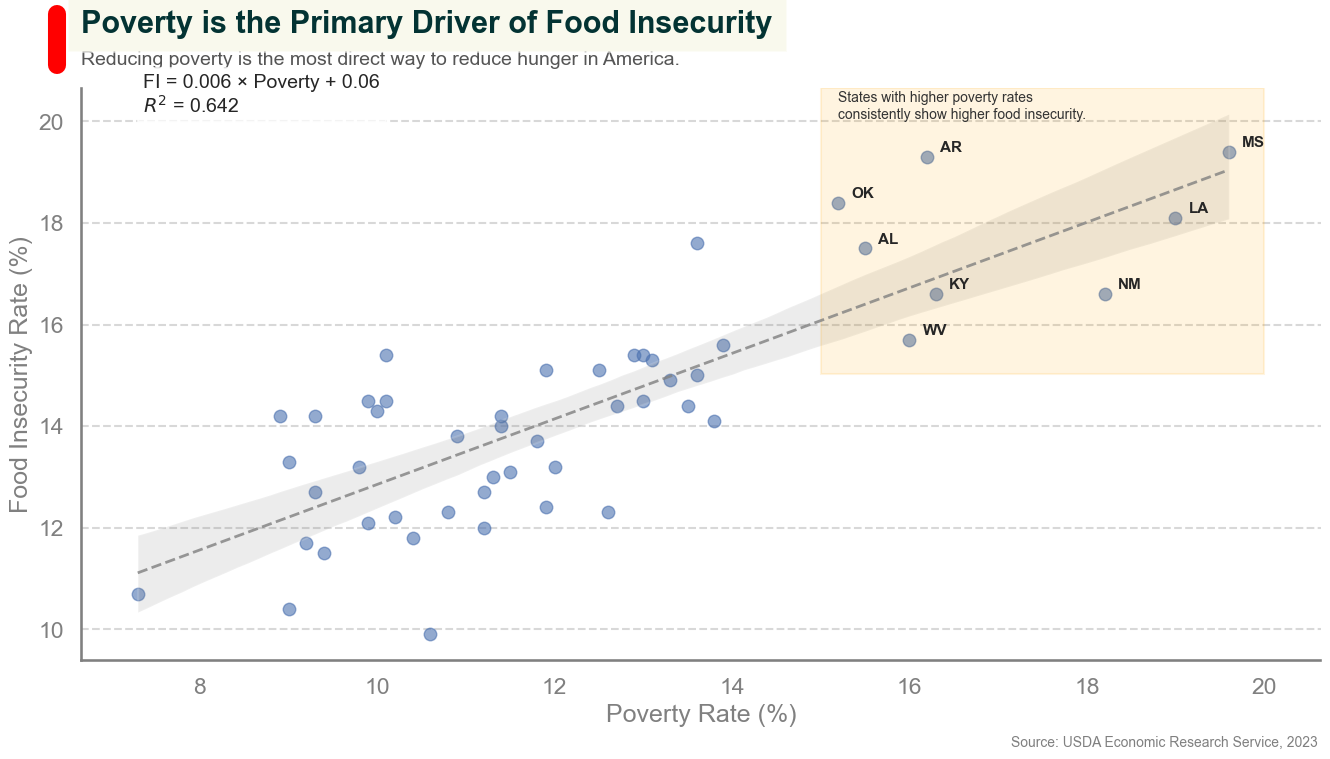

In [180]:
sns.set_theme(style="white", context='talk')

plt.figure(figsize=(14, 8))

sns.regplot(
    data=plot_df,
    x='poverty_pct',
    y='fi_rate_pct',
    scatter_kws={'alpha': 0.6},
            line_kws={'color': 'gray',  
                      'linestyle': '--', 
                      'linewidth': 2,   
                      'alpha': 0.8}
)

plt.title("Poverty is the Primary Driver of Food Insecurity", 
            fontsize=22,
            fontweight='bold',
            loc='left',
            color='#033333',
            bbox={'facecolor':'beige', 'alpha':0.5, 'pad':10},
            pad=40)
plt.xlabel("Poverty Rate (%)")
plt.ylabel("Food Insecurity Rate (%)")

latest = plot_df.sort_values(["state", "poverty_pct"], ascending=False).drop_duplicates("state")
top_states = latest.nlargest(8, "poverty_pct")

for _, row in top_states.iterrows():
    plt.text(
        row['poverty_pct'] + 0.15,
        row['fi_rate_pct'] + 0.1,
        row['state'],
        fontsize=11,
        weight='bold'
    )
sns.despine()
ax = plt.gca()
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')
ax.xaxis.label.set_color('gray')
ax.yaxis.label.set_color('gray')
ax.plot([-0.02, -0.02], [1.04, 1.13], transform=ax.transAxes, 
        color='red', linewidth=13, clip_on=False)

plt.text(x=15.2, y=20.6, 
         s='States with higher poverty rates\nconsistently show higher food insecurity.', 
         fontsize=10, 
         color='#333333', 
         ha='left',  
         va='top')    


plt.text(x=-0.0, y=1.041, 
         s='Reducing poverty is the most direct way to reduce hunger in America.', 
         transform=ax.transAxes, 
         fontsize=14, 
         color='#555555', 
         ha='left')
ax.grid(axis='y', linestyle='--', alpha=0.3, color='gray')
plt.text(x=0.75, y=-0.15, 
         s='Source: USDA Economic Research Service, 2023', 
         transform=ax.transAxes, 
         fontsize=10, 
         color='gray', 
         ha='left')
eq_text = f"FI = {slope:.3f} × Poverty + {intercept:.2f}\n$R^2$ = {r2:.3f}"
plt.text(
    0.05,
    0.95,
    eq_text,
    transform=plt.gca().transAxes,
    fontsize=14,
    verticalalignment="bottom",
    bbox=dict(facecolor="white", alpha=0.7)
)
plt.axvspan(15, 20, ymin=0.5, color='orange', alpha=0.12)
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()


In [181]:
states = gpd.read_file(
    "https://www2.census.gov/geo/tiger/GENZ2022/shp/cb_2022_us_state_20m.zip"
)
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,48,01779801,0400000US48,48,TX,Texas,00,676685555821,18974391187,"POLYGON ((-106.62344 31.91403, -106.63011 31.9..."
1,06,01779778,0400000US06,06,CA,California,00,403673617862,20291712025,"MULTIPOLYGON (((-118.59397 33.4672, -118.48478..."
2,21,01779786,0400000US21,21,KY,Kentucky,00,102266581101,2384240769,"POLYGON ((-89.54443 36.57451, -89.47935 36.566..."
3,13,01705317,0400000US13,13,GA,Georgia,00,149486268417,4418716153,"POLYGON ((-85.60516 34.98468, -85.47434 34.983..."
4,55,01779806,0400000US55,55,WI,Wisconsin,00,140292518676,29343193162,"MULTIPOLYGON (((-86.93428 45.42115, -86.83575 ..."


In [182]:
territories = ["PR", "AS", "GU", "MP", "VI"]
states = states[~states["STUSPS"].isin(territories)]
states = states.rename(columns={'STUSPS':'state'})


plot_map = states.merge(plot_df, on='state', how='left')
plot_map.head()
plot_map = plot_map.to_crs(epsg=5070)      
plot_map["centroid"] = plot_map.geometry.centroid
plot_map["lon"] = plot_map["centroid"].to_crs(epsg=4326).x
plot_map["lat"] = plot_map["centroid"].to_crs(epsg=4326).y
plot_map["lon_label"] = plot_map["lon"]
plot_map["lat_label"] = plot_map["lat"]

poverty_min = plot_map['poverty_pct'].min()
poverty_max = plot_map['poverty_pct'].max()

fi_min = plot_map['fi_rate_pct'].min()
fi_max = plot_map['fi_rate_pct'].max()

plot_map['poverty_lightness'] = 1 - (plot_map['poverty_pct'] - poverty_min) / (poverty_max - poverty_min)
plot_map['fi_lightness'] = 1 - (plot_map['fi_rate_pct'] - fi_min) / (fi_max - fi_min)

def choose_label_color(lightness):
    return "white" if lightness < 0.45 else "black"

plot_map['poverty_label_color'] = plot_map['poverty_lightness'].apply(choose_label_color)
plot_map['fi_label_color'] = plot_map['fi_lightness'].apply(choose_label_color)

#plot_map

In [183]:
geojson = json.loads(plot_df.to_json())

In [184]:
avg_poverty = plot_df['poverty_pct'].mean()
avg_fi = plot_df['fi_rate_pct'].mean()

high_poverty_states = plot_map[plot_map['poverty_pct'] > avg_poverty]
high_fi_states = plot_map[plot_map['fi_rate_pct'] > avg_fi]


In [185]:
def scale_size(val, vmin, vmax, min_s=14, max_s=28):
    if vmax == vmin:
        return min_s
    return min_s + (val - vmin) / (vmax - vmin) * (max_s - min_s)

top10_poverty = plot_map.nlargest(20, "poverty_pct").copy()
top3_poverty  = top10_poverty.nlargest(3, "poverty_pct")

top10_fi = plot_map.nlargest(20, "fi_rate_pct").copy()
top3_fi  = top10_fi.nlargest(3, "fi_rate_pct")

fig = make_subplots(
    rows=1,
    cols=2,
    horizontal_spacing=0.02,
    subplot_titles=[
        "Top 20 States by Poverty Rate (2023)",
        "Top 20 States by Food Insecurity Rate (2023)"
    ],
    specs=[[{"type": "choropleth"}, {"type": "choropleth"}]]
)

fig.add_trace(
    go.Choropleth(
        locations=plot_map['state'],
        locationmode="USA-states",
        z=plot_map['poverty_pct'],
        colorscale="Reds",
        zmin=plot_map['poverty_pct'].min(),
        zmax=plot_map['poverty_pct'].max(),
        colorbar=dict(
            title="Poverty (%)",
            orientation="h",
            x=0.22,
            y=-0.10,
            thickness=12,
            len=0.45
        ),
        showscale=True
    ),
    row=1, col=1
)

NE_STATES = ["ME","NH","VT","MA","CT","RI","NJ","DE","MD"]

for _, r in top10_poverty.iterrows():

    if r["state"] in NE_STATES:
        fig.add_trace(
            go.Scattergeo(
                lon=[r["lon_anchor"], r["lon_label"]],
                lat=[r["lat_anchor"], r["lat_label"]],
                mode="lines",
                line=dict(width=0.7, color="gray"),
                hoverinfo="skip",
                showlegend=False
            ),
            row=1, col=1
        )


    label_font = dict(
        size=10,
        #color=r["poverty_label_color"],
        color='white',
        family="Arial Black" if r["state"] in top3_poverty.state.values else "Arial"
    )

    fig.add_trace(
        go.Scattergeo(
            lon=[r["lon_label"]],
            lat=[r["lat_label"]],
            mode="text",
            text=f"{r.state}<br>{r.poverty_pct:.1f}%",
            textfont=label_font,
            hoverinfo="skip",
            showlegend=False
        ),
        row=1, col=1
    )

fig.add_trace(
    go.Choropleth(
        locations=plot_map['state'],
        locationmode="USA-states",
        z=plot_map['fi_rate_pct'],
        colorscale="Blues",
        zmin=plot_map['fi_rate_pct'].min(),
        zmax=plot_map['fi_rate_pct'].max(),
        colorbar=dict(
            title="Food Insecurity (%)",
            orientation="h",
            x=0.77,
            y=-0.10,
            thickness=12,
            len=0.45
        ),
        showscale=True
    ),
    row=1, col=2
)

for _, r in top10_fi.iterrows():

    if r["state"] in NE_STATES:
        fig.add_trace(
            go.Scattergeo(
                lon=[r["lon_anchor"], r["lon_label"]],
                lat=[r["lat_anchor"], r["lat_label"]],
                mode="lines",
                line=dict(width=0.7, color="gray"),
                hoverinfo="skip",
                showlegend=False
            ),
            row=1, col=2
        )

    

    label_font = dict(
        size=10,
        #color=r["fi_label_color"],
        color='white',
        family="Arial Black" if r["state"] in top3_fi.state.values else "Arial"
    )

    fig.add_trace(
        go.Scattergeo(
            lon=[r["lon_label"]],
            lat=[r["lat_label"]],
            mode="text",
            text=f"{r.state}<br>{r.fi_rate_pct:.1f}%",
            textfont=label_font,
            hoverinfo="skip",
            showlegend=False
        ),
        row=1, col=2
    )

poverty_belt = ["MS","LA","AR","AL","GA","SC","TN","KY","WV"]

belt_poly = plot_map[plot_map.state.isin(poverty_belt)]

belt_union = belt_poly.geometry.unary_union

belt_union_4326 = gpd.GeoSeries([belt_union], crs="EPSG:5070").to_crs("EPSG:4326").iloc[0]

xs, ys = belt_union_4326.exterior.xy

fig.add_trace(
    go.Scattergeo(
        lon=list(xs),
        lat=list(ys),
        mode="lines",
        line=dict(width=2, color="black"),
        fill="toself",
        fillcolor="rgba(200,0,0,0.07)",
        hoverinfo="skip",
        showlegend=False
    ),
    row=1, col=1
)

fig.add_annotation(
    x=0.02, y=0.02,
    xref="paper", yref="paper",
    text="Deep South ‘Poverty Belt’ highlighted<br>Persistent structural poverty + weak safety nets",
    showarrow=False,
    font=dict(size=12, color="#867F7F"),
    align="left"
)

fig.update_geos(
    scope="usa",
    projection_type="albers usa",
    showland=True,
    landcolor="white",
    showcountries=False,
    showcoastlines=False,
    showlakes=False
)

fig.update_layout(
    width=1400,
    height=760,
    title=dict(
        text="Poverty & Food Insecurity Across the United States (2023)"
             "<br><sup>Labels shown only for the 20 hardest-hit states</sup>",
        x=0.5,
        font=dict(size=24)
    ),
    margin=dict(l=15, r=15, t=130, b=70),
    dragmode=False,
    hovermode=False
)
fig.add_annotation(
    x=.93, y=1.2,
    xref="paper", yref="paper",
    text="<i>Source: USDA ERS; Feeding America; ACS 2023</i>",
    showarrow=False,
    font=dict(size=12, color="#555"),
    align="left"
)

fig.show()


C:\Users\farho\AppData\Local\Temp\ipykernel_22532\1212840158.py:144: DeprecationWarning:

The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.



In [186]:
plot_map["fi_children_pct"] = plot_map["fi_children_rate"] * 100
plot_map["fi_seniors_pct"]  = plot_map["fi_senior_rate"] * 100

fig = make_subplots(
    rows=1,
    cols=2,
    horizontal_spacing=0.03,
    subplot_titles=[
        "Food Insecurity Among Children (2023)",
        "Food Insecurity Among Seniors (2023)"
    ],
    specs=[[{"type": "choropleth"}, {"type": "choropleth"}]]
)

fig.add_trace(
    go.Choropleth(
        locations=plot_map["state"],
        locationmode="USA-states",
        z=plot_map["fi_children_pct"],
        colorscale="OrRd",
        zmin=plot_map["fi_children_pct"].min(),
        zmax=plot_map["fi_children_pct"].max(),
        colorbar=dict(
            title="Children (%)",
            orientation="h",
            x=0.22,
            y=-0.12,
            thickness=12,
            len=0.45
        ),
        showscale=True
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scattergeo(
        lon=plot_map["lon_label"],
        lat=plot_map["lat_label"],
        mode="text",
        text=plot_map.apply(
            lambda r: f"{r.state}<br>{r.fi_children_pct:.1f}%", axis=1
        ),
        textfont=dict(size=9, color="black"),
        hoverinfo="skip",
        showlegend=False
    ),
    row=1, col=1
)

fig.add_trace(
    go.Choropleth(
        locations=plot_map["state"],
        locationmode="USA-states",
        z=plot_map["fi_seniors_pct"],
        colorscale="PuBu",
        zmin=plot_map["fi_seniors_pct"].min(),
        zmax=plot_map["fi_seniors_pct"].max(),
        colorbar=dict(
            title="Seniors (%)",
            orientation="h",
            x=0.77,
            y=-0.12,
            thickness=12,
            len=0.45
        ),
        showscale=True
    ),
    row=1, col=2
)

fig.add_trace(
    go.Scattergeo(
        lon=plot_map["lon_label"],
        lat=plot_map["lat_label"],
        mode="text",
        text=plot_map.apply(
            lambda r: f"{r.state}<br>{r.fi_seniors_pct:.1f}%", axis=1
        ),
        textfont=dict(size=9, color="black"),
        hoverinfo="skip",
        showlegend=False
    ),
    row=1, col=2
)

fig.update_geos(
    scope="usa",
    projection_type="albers usa",
    showland=True,
    landcolor="white",
    showlakes=False,
    showcountries=False,
    showcoastlines=False,
)

fig.update_layout(
    title=dict(
        text="Food Insecurity Among Children vs Seniors (2023)<br>"
             "<sup>Labels and offsets reused from poverty map</sup>",
        x=0.5,
        font=dict(size=22)
    ),
    width=1500,
    height=760,
    margin=dict(l=20, r=20, t=110, b=40),
    hovermode=False,
    dragmode=False
)

fig.show()


In [187]:
NE_STATES = ["ME", "NH", "VT", "MA", "CT", "RI", "NJ", "DE", "MD"]

custom_anchor_points = {
    "ME": (-69.5, 44.8),
    "NH": (-71.0, 43.2),
    "VT": (-73.0, 44.0),
    "MA": (-72.4, 42.5),
    "CT": (-72.6, 41.6),
    "RI": (-71.2, 41.6),
    "NJ": (-74.5, 40.2),
    "DE": (-75.3, 39.0),
    "MD": (-76.7, 39.0),
}

label_offsets = {
    "ME": (8.0,  2.4),
    "NH": (7.4,  1.0),
    "VT": (7.2,  0.0),
    "MA": (7.0, -1.0),
    "CT": (7.4, -2.0),
    "RI": (8.0, -2.4),
    "NJ": (7.0, -3.2),
    "DE": (8.0, -4.0),
    "MD": (6.8, -4.8),
}

def offset_NE_label(row):
    st = row["state"]

    if st in NE_STATES:
        dx, dy = label_offsets[st]
        anchor_lon, anchor_lat = custom_anchor_points[st]

        lon_anchor = anchor_lon
        lat_anchor = anchor_lat

        lon_label = anchor_lon + dx
        lat_label = anchor_lat + dy

    else:
        lon_anchor = row["lon"]
        lat_anchor = row["lat"]
        lon_label  = row["lon"]
        lat_label  = row["lat"]

    return pd.Series({
        "lon_anchor": lon_anchor,
        "lat_anchor": lat_anchor,
        "lon_label": lon_label,
        "lat_label": lat_label
    })


plot_map[["lon_anchor", "lat_anchor", "lon_label", "lat_label"]] = (
    plot_map.apply(offset_NE_label, axis=1)
)

df_NE = plot_map[plot_map.state.isin(NE_STATES)]


def make_leader_lines(df):
    traces = []
    for _, r in df.iterrows():
        traces.append(
            go.Scattergeo(
                lon=[r.lon_anchor, r.lon_label],
                lat=[r.lat_anchor, r.lat_label],
                mode="lines",
                line=dict(width=0.6, color="gray"),
                hoverinfo="skip",
                showlegend=False
            )
        )
    return traces

poverty_lines = make_leader_lines(df_NE)
fi_lines = make_leader_lines(df_NE)


fig = make_subplots(
    rows=1,
    cols=2,
    horizontal_spacing=0.02,
    subplot_titles=[
        "Poverty Rate by State (2023)",
        "Food Insecurity Rate by State (2023)"
    ],
    specs=[[{"type": "choropleth"}, {"type": "choropleth"}]]
)

fig.add_trace(
    go.Choropleth(
        locations=plot_map['state'],
        locationmode="USA-states",
        z=plot_map['poverty_pct'],
        colorscale="Reds",
        zmin=plot_map['poverty_pct'].min(),
        zmax=plot_map['poverty_pct'].max(),
        colorbar=dict(
            title="Poverty (%)",
            orientation="h",
            x=0.22, y=-0.12,
            thickness=12, len=0.45
        ),
        showscale=True
    ),
    row=1, col=1
)

for line in poverty_lines:
    fig.add_trace(line, row=1, col=1)

fig.add_trace(
    go.Scattergeo(
        lon=plot_map["lon_label"],
        lat=plot_map["lat_label"],
        mode='text',
        text=plot_map.apply(lambda r: f"{r.state}<br>{r.poverty_pct:.1f}%", axis=1),
        textfont=dict(size=9, color="black"),
        hoverinfo="skip",
        showlegend=False
    ),
    row=1, col=1
)

fig.add_trace(
    go.Choropleth(
        locations=plot_map['state'],
        locationmode="USA-states",
        z=plot_map['fi_rate_pct'],
        colorscale="Blues",
        zmin=plot_map['fi_rate_pct'].min(),
        zmax=plot_map['fi_rate_pct'].max(),
        colorbar=dict(
            title="FI (%)",
            orientation="h",
            x=0.77, y=-0.12,
            thickness=12, len=0.45
        ),
        showscale=True
    ),
    row=1, col=2
)

for line in fi_lines:
    fig.add_trace(line, row=1, col=2)

fig.add_trace(
    go.Scattergeo(
        lon=plot_map["lon_label"],
        lat=plot_map["lat_label"],
        mode='text',
        text=plot_map.apply(lambda r: f"{r.state}<br>{r.fi_rate_pct:.1f}%", axis=1),
        textfont=dict(size=9, color="#002c6d"),
        hoverinfo="skip",
        showlegend=False
    ),
    row=1, col=2
)

fig.update_geos(
    scope="usa",
    projection_type="albers usa",
    showcountries=False,
    showcoastlines=False,
    showland=True,
    landcolor="white"
)

fig.update_layout(
    width=1500,
    height=760,
    title=dict(
        text="Poverty & Food Insecurity Across the U.S. (2023)"
             "<br><sup>Leader lines shown ONLY for crowded Northeast states</sup>",
        x=0.5,
        font=dict(size=24)
    ),
    margin=dict(l=10, r=10, t=120, b=40),
    dragmode=False,
    hovermode=False
)

fig.show()


In [188]:
plot_map["fi_children_pct"] = plot_map["fi_children_rate"] * 100

NE_STATES_ORDERED = ["ME", "NH", "VT", "MA", "RI", "CT", "NY", "NJ", "DE", "MD"]

LABEL_X = -66.0      
START_LAT = 47.0     
ROW_SPACING = 1.4    

ne_positions = {}
for i, st in enumerate(NE_STATES_ORDERED):
    row = plot_map.loc[plot_map.state == st].iloc[0]

    ne_positions[st] = {
        "lon_anchor": row["lon"],
        "lat_anchor": row["lat"],
        "lon_label": LABEL_X,                
        "lat_label": START_LAT - i * ROW_SPACING
    }


def place_NE_labels(row):
    st = row["state"]
    if st in ne_positions:
        p = ne_positions[st]
        return pd.Series({
            "lon_anchor": p["lon_anchor"],
            "lat_anchor": p["lat_anchor"],
            "lon_label": p["lon_label"],
            "lat_label": p["lat_label"]
        })
    else:
        return pd.Series({
            "lon_anchor": row["lon"],
            "lat_anchor": row["lat"],
            "lon_label": row["lon"],
            "lat_label": row["lat"]
        })


plot_map[["lon_anchor", "lat_anchor", "lon_label", "lat_label"]] = (
    plot_map.apply(place_NE_labels, axis=1)
)

ne_df = plot_map[plot_map.state.isin(NE_STATES_ORDERED)]
non_ne_df = plot_map[~plot_map.state.isin(NE_STATES_ORDERED)]
mid = plot_map["fi_children_pct"].median()

plot_map["label_color"] = plot_map["fi_children_pct"].apply(
    lambda v: "white" if v >= mid else "black"
)

# Refresh subsets so they now include label_color
ne_df = plot_map[plot_map.state.isin(NE_STATES_ORDERED)].copy()
non_ne_df = plot_map[~plot_map.state.isin(NE_STATES_ORDERED)].copy()
leader_traces = []
for _, r in ne_df.iterrows():
    leader_traces.append(
        go.Scattergeo(
            lon=[r["lon_anchor"], r["lon_label"]],
            lat=[r["lat_anchor"], r["lat_label"]],
            mode="lines",
            line=dict(width=0.6, color="gray"),
            hoverinfo="skip",
            showlegend=False
        )
    )

def choose_label_color(val, midpoint):
    return "white" if val >= midpoint else "black"

mid = plot_map["fi_children_pct"].median()   

plot_map["label_color"] = plot_map["fi_children_pct"].apply(
    lambda v: choose_label_color(v, mid)
)

fig = go.Figure()

fig.add_trace(
    go.Choropleth(
        locations=plot_map["state"],
        locationmode="USA-states",
        z=plot_map["fi_children_pct"],
        colorscale="blues",
        zmin=plot_map["fi_children_pct"].min(),
        zmax=plot_map["fi_children_pct"].max(),
        colorbar=dict(
            title="Children (%)",
            orientation="h",
            x=0.50,
            y=-0.15,
            thickness=12,
            len=0.55
        ),
        showscale=True
    )
)

for t in leader_traces:
    fig.add_trace(t)

fig.add_trace(
    go.Scattergeo(
        lon=non_ne_df["lon_label"],
        lat=non_ne_df["lat_label"],
        mode="text",
        text=non_ne_df.apply(
            lambda r: f"{r.state}<br>{r.fi_children_pct:.1f}%", axis=1
        ),
        textfont=dict(
            size=9,
            color=non_ne_df["label_color"]    
        ),
        hoverinfo="skip",
        showlegend=False
    )
)

fig.add_trace(
    go.Scattergeo(
        lon=ne_df["lon_label"],
        lat=ne_df["lat_label"],
        mode="text",
        text=ne_df.apply(
            lambda r: f"{r.state} {r.fi_children_pct:.1f}%", axis=1
        ),
        textfont=dict(
            size=9,
            color='rgb(0,0,0)'     
        ),
        hoverinfo="skip",
        showlegend=False
    )
)



fig.update_geos(
    scope="usa",
    projection_type="albers usa",
    showland=True,
    landcolor="white",
    showcountries=False,
    showcoastlines=False,
    showlakes=False
)

fig.update_layout(
    title=dict(
        text="Food Insecurity Among Children (2023)<br>"
             "<sup>Northeast labels aligned in a vertical column with leader lines</sup>",
        x=0.5,
        font=dict(size=26)
    ),
    width=1100,
    height=750,
    margin=dict(l=20, r=20, t=120, b=80),
    hovermode=False,
    dragmode=False
)

fig.show()


In [189]:
top12 = (
    plot_df.sort_values("poverty_pct", ascending=False)
           .head(12)
           .copy()
)

top12


,state,state_name,year,fi_rate,fi_count,fi_children_rate,fi_children_count,fi_senior_rate,fi_senior_count,fi_older_rate,...,food_insecurity,fruit_and_vegetable_consumption,high_blood_pressure,housing_cost_burden,income_inequality,insufficient_sleep,obesity,physical_inactivity,fi_rate_pct,poverty_pct
129,MS,Mississippi,2023,0.194,571660,0.230,155190,0.122,88523.796875,0.196,...,16.2,4.1,46.0,26.7,5.31,NaN,40.1,33.4,19.4,19.6
94,LA,Louisiana,2023,0.181,827690,0.234,248630,0.130,131511.508240,0.153,...,16.2,6.2,43.3,30.3,5.61,NaN,39.9,30.1,18.1,19.0
164,NM,New Mexico,2023,0.166,350010,0.233,104390,0.107,59360.334503,0.184,...,12.9,6.2,34.1,28.1,5.15,NaN,35.3,24.0,16.6,18.2
89,KY,Kentucky,2023,0.166,753410,0.211,213830,0.120,131409.673096,0.146,...,14.5,8.9,39.9,25.9,5.04,NaN,37.7,26.4,16.6,16.3
14,AR,Arkansas,2023,0.193,592860,0.240,167940,0.132,101896.638855,0.170,...,18.9,10.2,42.5,25.2,4.77,NaN,40.0,32.5,19.3,16.2
249,WV,West Virginia,2023,0.157,277720,0.202,71140,0.107,54128.852753,0.101,...,13.7,5.1,45.1,20.9,4.87,NaN,41.2,32.0,15.7,16.0
9,AL,Alabama,2023,0.175,896510,0.222,250580,0.081,103465.032349,0.108,...,11.5,4.8,44.7,25.4,4.99,NaN,39.2,29.1,17.5,15.5
184,OK,Oklahoma,2023,0.184,745130,0.240,231800,0.099,90709.603027,0.111,...,15.4,3.8,38.4,27.7,4.70,NaN,38.7,31.0,18.4,15.2
214,TN,Tennessee,2023,0.156,1111150,0.198,308920,0.075,130622.943726,0.125,...,11.7,6.8,40.7,27.3,4.66,NaN,37.6,26.0,15.6,13.9
204,SC,South Carolina,2023,0.141,757840,0.172,196320,0.086,125464.794434,0.144,...,14.4,8.0,38.9,26.4,4.62,NaN,36.0,26.3,14.1,13.8


In [190]:
plot_df[['state', 'fi_rate', 'fi_rate_pct']].head(15)


,state,fi_rate,fi_rate_pct
4,AK,0.145,14.5
9,AL,0.175,17.5
14,AR,0.193,19.3
19,AZ,0.144,14.4
24,CA,0.137,13.7
29,CO,0.127,12.7
34,CT,0.143,14.3
44,DE,0.130,13.0
49,FL,0.144,14.4
54,GA,0.149,14.9


In [191]:
top12_long = top12.melt(
    id_vars=["state"],
    value_vars=["poverty_pct", "fi_rate_pct"],
    var_name="metric",
    value_name="percent"
)
top12_long


,state,metric,percent
0,MS,poverty_pct,19.6
1,LA,poverty_pct,19.0
2,NM,poverty_pct,18.2
3,KY,poverty_pct,16.3
4,AR,poverty_pct,16.2
5,WV,poverty_pct,16.0
6,AL,poverty_pct,15.5
7,OK,poverty_pct,15.2
8,TN,poverty_pct,13.9
9,SC,poverty_pct,13.8


In [192]:
plot_df.columns

Index(['state', 'state_name', 'year', 'fi_rate', 'fi_count',
       'fi_children_rate', 'fi_children_count', 'fi_senior_rate',
       'fi_senior_count', 'fi_older_rate', 'fi_older_count', 'fi_black',
       'fi_hispanic', 'fi_white', 'snap_threshold', 'cost_per_meal',
       'weekly_shortfall', 'annual_shortfall', 'fips', 'census_region',
       'census_division', 'households', 'interviewed', 'fi_moe', 'vlfi_rate',
       'vlfi_moe', 'poverty_total', 'poverty_men', 'poverty_women',
       'poverty_children', 'poverty_18_64', 'poverty_65plus', 'data_year(s)',
       'avoided_care_due_to_cost', 'crowded_housing', 'diabetes',
       'economic_hardship_index', 'food_insecurity',
       'fruit_and_vegetable_consumption', 'high_blood_pressure',
       'housing_cost_burden', 'income_inequality', 'insufficient_sleep',
       'obesity', 'physical_inactivity', 'fi_rate_pct', 'poverty_pct'],
      dtype='object')

In [193]:
health_cols = ["obesity", "diabetes", 'high_blood_pressure'] 

corr_df = (
    plot_df[["fi_rate_pct"] + health_cols]
    .corr()
    .loc[health_cols, "fi_rate_pct"]
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={"index": "condition", "fi_rate_pct": "correlation"})
)

corr_df


,condition,correlation
0,high_blood_pressure,0.648274
1,diabetes,0.645519
2,obesity,0.513163


C:\Users\farho\AppData\Local\Temp\ipykernel_22532\3168636129.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




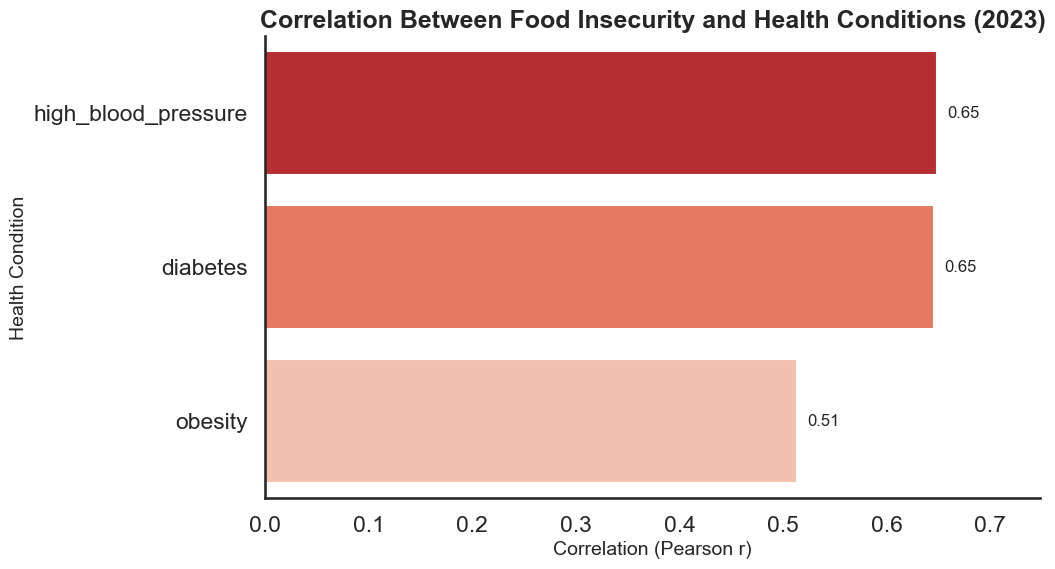

In [194]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=corr_df,
    x="correlation",
    y="condition",
    palette="Reds_r"
)

plt.title("Correlation Between Food Insecurity and Health Conditions (2023)", fontsize=18, weight="bold")
plt.xlabel("Correlation (Pearson r)", fontsize=14)
plt.ylabel("Health Condition", fontsize=14)

for i, v in enumerate(corr_df["correlation"]):
    plt.text(v + 0.01, i, f"{v:.2f}", va='center', fontsize=12)

plt.xlim([0, corr_df["correlation"].max() + 0.1])

sns.despine()
plt.show()


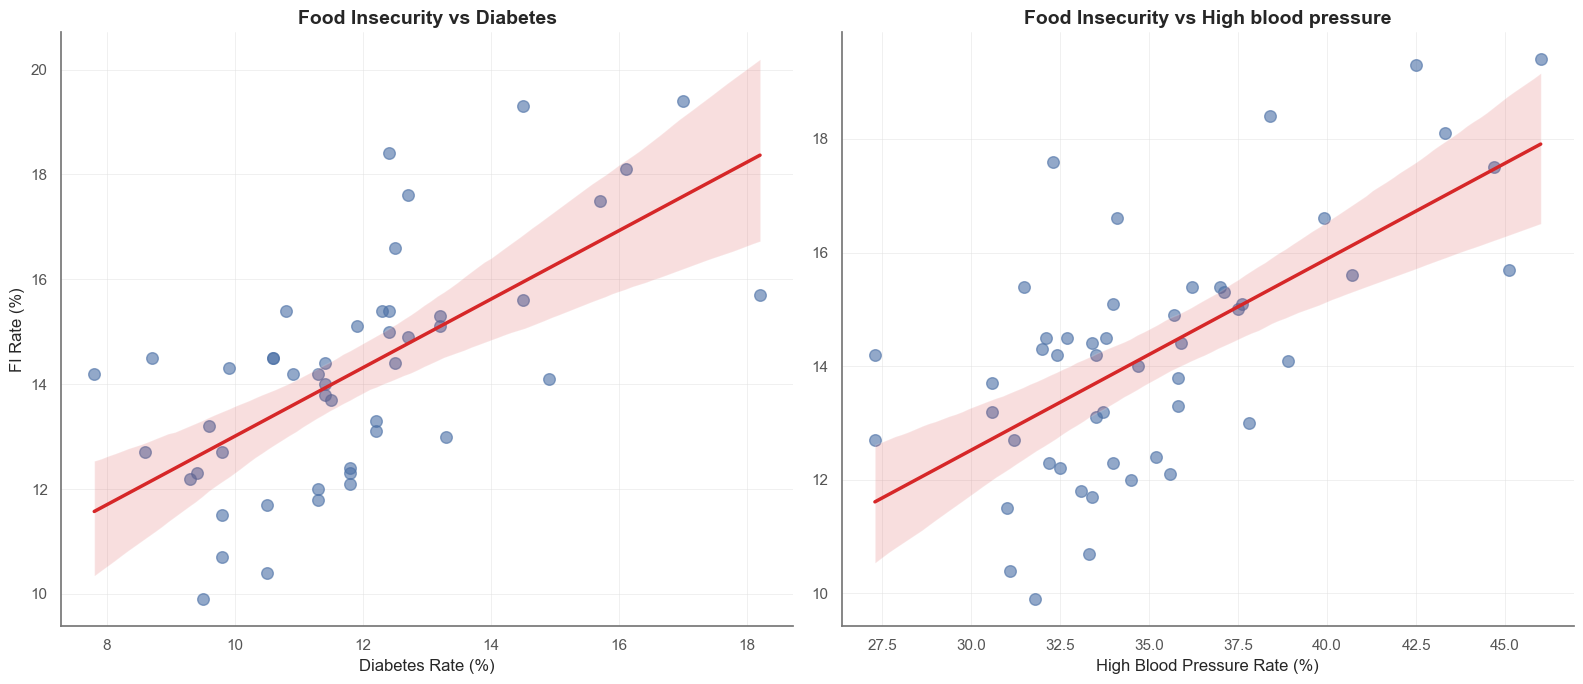

In [195]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(16,7))

pairs = [
    ("diabetes", "Food Insecurity vs Diabetes"),
    ("high_blood_pressure", "Food Insecurity vs High blood pressure")
    
]

for ax, (col, title) in zip(axes, pairs):
    sns.regplot(
        x=plot_df[col],
        y=plot_df["fi_rate_pct"],
        ax=ax,
        scatter_kws={"alpha":0.6, "s":70, "color":"#4a6fa5"},
        line_kws={"color":"#d62728", "linewidth":2.5}
    )
    
    ax.set_title(title, fontsize=14, weight="bold")
    ax.set_xlabel(f"{col.replace('_',' ').title()} Rate (%)")
    ax.set_ylabel("FI Rate (%)" if ax==axes[0] else "")

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.spines['left'].set_color("#777777")
    ax.spines['bottom'].set_color("#777777")

    ax.tick_params(colors="#555555")

    ax.grid(color="#DDDDDD", linestyle='-', linewidth=0.5, alpha=0.6)

fig.tight_layout()
plt.show()

In [196]:
from sklearn.preprocessing import StandardScaler

health_vars = ["diabetes", "high_blood_pressure"]

scaler = StandardScaler()
plot_df["HBI"] = scaler.fit_transform(plot_df[health_vars]).mean(axis=1)


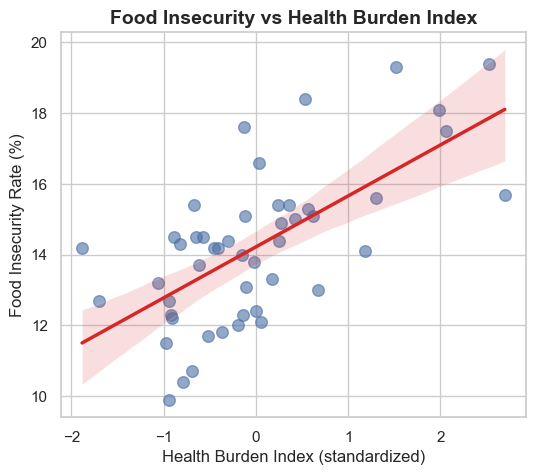

In [197]:
plt.figure(figsize=(6,5))
sns.regplot(
    x=plot_df["HBI"], y=plot_df["fi_rate_pct"],
    scatter_kws={"alpha":0.6, "s":70, "color":"#4a6fa5"},
    line_kws={"color":"#d62728","linewidth":2.5}
)
plt.title("Food Insecurity vs Health Burden Index", fontsize=14, weight="bold")
plt.xlabel("Health Burden Index (standardized)")
plt.ylabel("Food Insecurity Rate (%)")

plt.show()


In [198]:
model_df = plot_df.copy()

predictors = [
    "poverty_pct",
    "cost_per_meal",
    "obesity",
    "diabetes",
    "high_blood_pressure",
    "income_inequality",
    "avoided_care_due_to_cost",
    "housing_cost_burden",
    "crowded_housing",
    "fruit_and_vegetable_consumption"
]

predictors = [c for c in predictors if c in model_df.columns]

target = "fi_rate_pct"

model_df = model_df[["state", target] + predictors].dropna()

model_df.head()


,state,fi_rate_pct,poverty_pct,cost_per_meal,obesity,diabetes,high_blood_pressure,income_inequality,avoided_care_due_to_cost,housing_cost_burden,crowded_housing,fruit_and_vegetable_consumption
4,AK,14.5,10.1,4.23,35.2,8.7,33.8,4.35,11.1,28.2,6.0,8.9
9,AL,17.5,15.5,3.50,39.2,15.7,44.7,4.99,13.5,25.4,2.0,4.8
14,AR,19.3,16.2,3.22,40.0,14.5,42.5,4.77,13.9,25.2,2.5,10.2
19,AZ,14.4,13.5,3.32,31.9,11.4,33.4,4.50,12.1,31.0,4.4,6.3
24,CA,13.7,11.8,3.63,27.7,11.5,30.6,5.14,10.7,41.1,8.2,9.0


In [199]:


X = model_df[predictors].values
y = model_df[target].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [200]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_scaled, y)

coef = reg.coef_
r2 = reg.score(X_scaled, y)

print(f"R² = {r2:.3f}")


R² = 0.777


In [201]:
coef_df = (
    pd.DataFrame({
        "variable": predictors,
        "coef": coef
    })
    .sort_values("coef", key=abs, ascending=False)
)

coef_df


,variable,coef
0,poverty_pct,1.199006
4,high_blood_pressure,1.148816
3,diabetes,-0.845592
7,housing_cost_burden,0.590672
6,avoided_care_due_to_cost,0.589372
2,obesity,0.423694
8,crowded_housing,0.385907
5,income_inequality,-0.259034
1,cost_per_meal,-0.220954
9,fruit_and_vegetable_consumption,0.072461


C:\Users\farho\AppData\Local\Temp\ipykernel_22532\1480999044.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




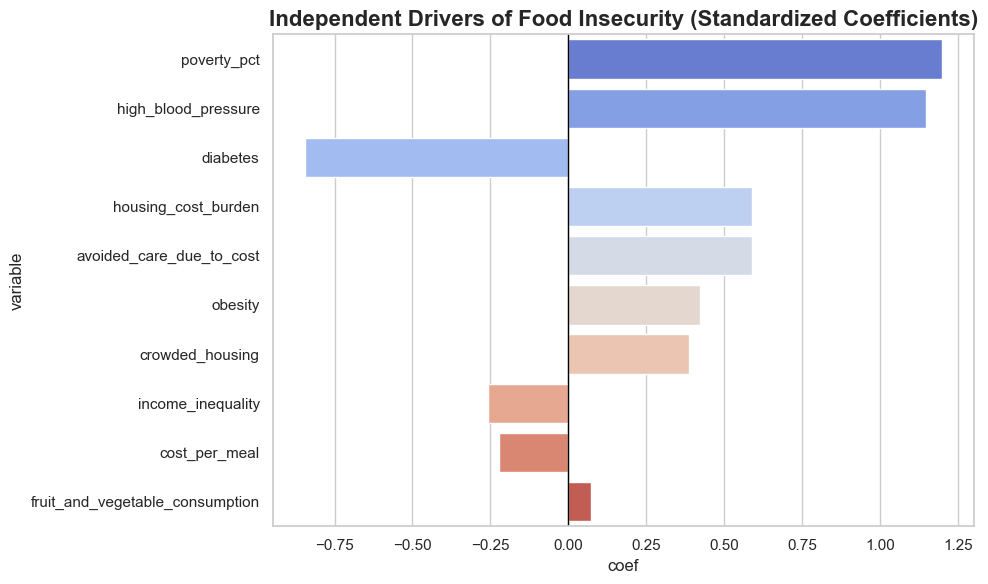

In [202]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=coef_df,
    x="coef", y="variable",
    palette="coolwarm"
)
plt.title("Independent Drivers of Food Insecurity (Standardized Coefficients)", 
          fontsize=16, weight="bold")
plt.axvline(0, color="black", linewidth=1)
plt.tight_layout()
plt.show()


In [203]:
data = {
    "variable": [
        "poverty_pct", "diabetes", "avoided_care_due_to_cost", 
        "obesity", "high_blood_pressure", "cost_per_meal",
        "crowded_housing", "fruit_and_vegetable_consumption",
        "income_inequality", "housing_cost_burden"
    ],
    "importance": [
        0.436416, 0.110694, 0.110533, 0.082421, 0.067859,
        0.061344, 0.041742, 0.039349, 0.028237, 0.021404
    ],
    "explanation": [
        "Strongest driver. Higher poverty almost always means higher FI.",
        "Chronic disease correlates with food insecurity.",
        "Skipping medical care due to cost predicts FI.",
        "Obesity rises where food insecurity is high.",
        "Hypertension linked to FI and poverty.",
        "Higher food prices increase FI.",
        "Crowding indicates economic strain.",
        "Healthier diets fall in food-insecure states.",
        "Relative inequality is weaker than poverty.",
        "Housing strain matters but is a small driver."
    ],
    "policy_relevance": [
        "Anti-poverty programs reduce FI the most.",
        "Improve preventive healthcare.",
        "Reduce healthcare barriers and costs.",
        "Improve nutrition access and SNAP quality.",
        "Improve chronic disease management access.",
        "Lower food prices or expand SNAP benefits.",
        "Improve affordable housing access.",
        "Expand healthy food incentives.",
        "Focus on absolute poverty first.",
        "Housing help is helpful but secondary."
    ]
}

df = pd.DataFrame(data)
df.insert(0, "rank", range(1, len(df) + 1))
df


,rank,variable,importance,explanation,policy_relevance
0,1,poverty_pct,0.436416,Strongest driver. Higher poverty almost always...,Anti-poverty programs reduce FI the most.
1,2,diabetes,0.110694,Chronic disease correlates with food insecurity.,Improve preventive healthcare.
2,3,avoided_care_due_to_cost,0.110533,Skipping medical care due to cost predicts FI.,Reduce healthcare barriers and costs.
3,4,obesity,0.082421,Obesity rises where food insecurity is high.,Improve nutrition access and SNAP quality.
4,5,high_blood_pressure,0.067859,Hypertension linked to FI and poverty.,Improve chronic disease management access.
5,6,cost_per_meal,0.061344,Higher food prices increase FI.,Lower food prices or expand SNAP benefits.
6,7,crowded_housing,0.041742,Crowding indicates economic strain.,Improve affordable housing access.
7,8,fruit_and_vegetable_consumption,0.039349,Healthier diets fall in food-insecure states.,Expand healthy food incentives.
8,9,income_inequality,0.028237,Relative inequality is weaker than poverty.,Focus on absolute poverty first.
9,10,housing_cost_burden,0.021404,Housing strain matters but is a small driver.,Housing help is helpful but secondary.


In [204]:
importance_df = pd.DataFrame({
    "variable": [
        "poverty_pct",
        "diabetes_rate",
        "avoided_care_due_to_cost",
        "obesity_rate",
        "high_blood_pressure_rate"
    ],
    "importance": [0.41, 0.12, 0.11, 0.10, 0.07],
    "explanation": [
        "Poverty is the strongest structural driver of food insecurity.",
        "Chronic illnesses increase medical costs and financial strain.",
        "Forgoing care due to cost signals household financial stress.",
        "Obesity is linked with limited access to healthy foods.",
        "High blood pressure overlaps with economic and dietary stress."
    ]
})


In [205]:
importance_df = importance_df.sort_values("importance", ascending=False).reset_index(drop=True)

importance_df["variable_clean"] = importance_df["variable"].str.replace("_"," ").str.title()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=importance_df["importance"],
    y=importance_df["variable_clean"],
    orientation="h",
    marker=dict(
        color=importance_df["importance"],
        colorscale="Reds",
        showscale=False
    ),
    name="Importance",
))

fig.add_trace(go.Scatter(
    x=[importance_df["importance"].max() * 1.15] * len(importance_df),   
    y=importance_df["variable_clean"],
    mode="text",
    text=importance_df["explanation"],
    textfont=dict(size=12, color="black"),
    showlegend=False,
    xaxis="x2"
))

fig.update_layout(
    title=dict(
        text="Drivers of Food Insecurity (Random Forest Feature Importance)",
        x=0.5,
        font=dict(size=22)
    ),
    width=1350,
    height=750,
    margin=dict(l=150, r=350, t=100, b=40),
    bargap=0.35,
    plot_bgcolor="white",

    xaxis=dict(
        title="Importance",
        domain=[0, 0.55]     
    ),
    xaxis2=dict(
        domain=[0.57, 1.0],  
        showticklabels=False,
        showgrid=False,
        zeroline=False
    ),

    yaxis=dict(autorange="reversed")
)

fig.show()


In [206]:
import textwrap
def wrap_text(s, width=38):
    return "<br>".join(textwrap.wrap(s, width=width))

importance_df = importance_df.sort_values("importance", ascending=False).reset_index(drop=True)

importance_df["variable_clean"] = (
    importance_df["variable"]
    .str.replace("_"," ")
    .str.title()
)

importance_df["explanation_wrapped"] = importance_df["explanation"].apply(wrap_text)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=importance_df["importance"],
    y=importance_df["variable_clean"],
    orientation="h",
    marker=dict(
        color=importance_df["importance"],
        colorscale="Reds",
        showscale=False
    ),
    name="Importance",
))

fig.add_trace(go.Scatter(
    x=[importance_df["importance"].max() * 1.35] * len(importance_df),
    y=importance_df["variable_clean"],
    mode="text",
    text=importance_df["explanation_wrapped"],
    textfont=dict(size=12, color="black"),
    showlegend=False,
    xaxis="x2"
))

fig.update_layout(
    title=dict(
        text="Drivers of Food Insecurity (Random Forest Feature Importance)",
        x=0.5,
        font=dict(size=22)
    ),
    width=1600,
    height=800,
    margin=dict(l=200, r=400, t=120, b=40),
    plot_bgcolor="white",

    
    xaxis=dict(
        title="Importance",
        domain=[0.15, 0.60] 
    ),
    xaxis2=dict(
        domain=[0.62, 1.0],
        showticklabels=False,
        showgrid=False,
        zeroline=False
    ),

    yaxis=dict(
        automargin=True,
        autorange="reversed"
    )
)

fig.show()


In [207]:
def wrap_text(s, width=38):
    return "<br>".join(textwrap.wrap(s, width=width))

importance_df = importance_df.sort_values("importance", ascending=False).reset_index(drop=True)

importance_df["variable_clean"] = (
    importance_df["variable"]
    .str.replace("_"," ")
    .str.title()
)

importance_df["explanation_wrapped"] = importance_df["explanation"].apply(wrap_text)

fig = go.Figure()

nyt_red = "#b22222"  
nyt_light = "#f2e9e7"

fig.add_trace(go.Bar(
    x=importance_df["importance"],
    y=importance_df["variable_clean"],
    orientation="h",
    marker=dict(
        color=nyt_red,
        opacity=0.85
    ),
    hoverinfo="skip",
))

fig.add_trace(go.Scatter(
    x=[importance_df["importance"].max() * 1.32] * len(importance_df),
    y=importance_df["variable_clean"],
    mode="text",
    text=importance_df["explanation_wrapped"],
    textfont=dict(size=13, color="#333333", family="Helvetica"),
    showlegend=False,
    xaxis="x2"
))

fig.update_layout(
    title=dict(
        text="<span style='font-family:Georgia; font-size:26px'>Drivers of Food Insecurity in America</span>"
             "<br><span style='font-size:15px; color:#555'>Random Forest Feature Importance</span>",
        x=0.47,
    ),
    width=1600,
    height=850,
    margin=dict(l=200, r=450, t=150, b=80),
    plot_bgcolor="white",
    paper_bgcolor="white",

    xaxis=dict(
        title="Importance",
        domain=[0.18, 0.60],
        tickfont=dict(size=13, family="Helvetica"),
        gridcolor="#e5e5e5",
        zeroline=False
    ),

    xaxis2=dict(
        domain=[0.63, 1.0],
        showticklabels=False,
        showgrid=False,
        zeroline=False
    ),

    yaxis=dict(
        automargin=True,
        autorange="reversed",
        tickfont=dict(size=14, family="Helvetica", color="#222"),
    )
)

fig.show()


In [208]:
top5_df = (
    importance_df.sort_values("importance", ascending=False)
                 .head(5)
                 .reset_index(drop=True)
)

top5_df["variable_clean"] = (
    top5_df["variable"]
            .str.replace("_"," ")
            .str.title()
)

def wrap_text(s, width=38):
    return "<br>".join(textwrap.wrap(s, width=width))

top5_df["explanation_wrapped"] = top5_df["explanation"].apply(wrap_text)

nyt_red = "#b22222"

fig = go.Figure()

fig.add_trace(go.Bar(
    x=top5_df["importance"],
    y=top5_df["variable_clean"],
    orientation="h",
    marker=dict(
        color=nyt_red,
        opacity=0.9
    ),
    hoverinfo="skip",
))

fig.add_trace(go.Scatter(
    x=[top5_df["importance"].max() * 1.30] * len(top5_df),
    y=top5_df["variable_clean"],
    mode="text",
    text=top5_df["explanation_wrapped"],
    textfont=dict(size=18, color="#333333", family="Helvetica"),
    showlegend=False,
    xaxis="x2"
))

fig.update_layout(
    title=dict(
        text="<span style='font-family:Georgia; font-size:26px'>Top Five Drivers of Food Insecurity in America</span>"
             "<br><span style='font-size:15px; color:#555'>Random Forest Feature Importance</span>",
        x=0.5,
    ),
    width=1500,
    height=700,
    margin=dict(l=200, r=450, t=140, b=70),
    plot_bgcolor="white",
    paper_bgcolor="white",

    xaxis=dict(
        title="Importance",
        domain=[0.18, 0.60],
        tickfont=dict(size=13, family="Helvetica"),
        gridcolor="#e5e5e5",
        zeroline=False
    ),

    xaxis2=dict(
        domain=[0.63, 1.0],
        showticklabels=False,
        showgrid=False,
        zeroline=False
    ),

    yaxis=dict(
        automargin=True,
        autorange="reversed",
        tickfont=dict(size=14, family="Helvetica", color="#222"),
    )
)

fig.show()


In [209]:
intro_df = plot_df.copy()

total_fi = intro_df["fi_count"].sum()
total_children = intro_df["fi_children_count"].sum()
total_seniors = intro_df["fi_senior_count"].sum()

one_in_x = 330_000_000 / total_fi    


In [210]:
def fmt(n):
    return f"{n/1_000_000:.1f}M"

fig = go.Figure()


labels = ["Total Food-Insecure Americans", 
          "Food-Insecure Children", 
          "Food-Insecure Older Adults"]

values = [fmt(total_fi), fmt(total_children), fmt(total_seniors)]

subtitles = [
    f"≈ 1 in {one_in_x:.0f} Americans",
    "Children under 18",
    "Ages 60+"
]

colors = ["#b22222", "#d95f02", "#1b70c4"]  

for i in range(3):
    fig.add_trace(go.Indicator(
        mode="number",
        value=0,   
        number=dict(
            valueformat="", 
            font=dict(size=60, color=colors[i], family="Georgia")
        ),
        title=(
            f"<span style='font-size:22px; color:#111; font-family:Helvetica'>{labels[i]}</span>"
            f"<br><span style='font-size:60px; font-weight:bold; color:{colors[i]}; font-family:Georgia'>{values[i]}</span>"
            f"<br><span style='font-size:15px; color:#555; font-family:Helvetica'>{subtitles[i]}</span>"
        ),
        domain={'row': 0, 'column': i}
    ))

fig.update_layout(
    grid={'rows': 1, 'columns': 3},
    width=1500,
    height=420,
    title=dict(
        text="<span style='font-size:34px; font-family:Georgia'>How Many People Struggle With Food Insecurity in America?</span>",
        x=0.5,
        y=0.95
    ),
    margin=dict(l=40, r=40, t=120, b=40),
    paper_bgcolor="white"
)

fig.show()


In [211]:

total_fi = 48_400_000  
children_fi = 13_300_000  
seniors_fi = 7_100_000  

def fmt(x):
    return f"{x/1_000_000:.1f}M"

fig = go.Figure()

fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.update_layout(
    paper_bgcolor="white",
    plot_bgcolor="white",
    width=1800,            
    height=720,
    margin=dict(l=20, r=20, t=20, b=20)
)

fig.add_annotation(
    x=0.5, y=0.93, xref="paper", yref="paper",
    text="<span style='font-size:44px; font-family:Georgia;'>"
         "How Many People Struggle With Food Insecurity in America?</span>",
    showarrow=False
)

xs = [0.18, 0.50, 0.82]    

titles = [
    "Americans Facing Food Insecurity",
    "Food-Insecure Children",
    "Food-Insecure Older Adults"
]

numbers = [fmt(total_fi), fmt(children_fi), fmt(seniors_fi)]
colors = ["#b22222", "#d95f02", "#1b70c4"]

subtitles = [
    "≈ 1 in 7 Americans",
    "Children under 18",
    "Ages 60+"
]

for i in range(3):
    x = xs[i]

    fig.add_annotation(
        x=x, y=0.73, xref="paper", yref="paper",
        text=f"<span style='font-size:24px; font-family:Helvetica;'>{titles[i]}</span>",
        showarrow=False
    )

 
    fig.add_annotation(
        x=x, y=0.54, xref="paper", yref="paper",
        text=f"<span style='font-size:80px; font-weight:bold; color:{colors[i]}; font-family:Georgia;'>{numbers[i]}</span>",
        showarrow=False
    )

    fig.add_annotation(
        x=x, y=0.37, xref="paper", yref="paper",
        text=f"<span style='font-size:21px; color:#555; font-family:Helvetica;'>{subtitles[i]}</span>",
        showarrow=False
    )
fig.add_annotation(
    x=0.8, y=0.02,                 
    xref="paper", yref="paper",
    text=(
        "<span style='font-size:14px; color:#777; font-family:Helvetica;'>"
        "Source: USDA Economic Research Service (2023) — Food Security Report."
        "</span>"
    ),
    showarrow=False
)

fig.show()


In [212]:
risk_df = pd.DataFrame({
    'issue': [
        "Poor Mental Health",
        "Avoided Care Due to Cost",
        "Diabetes",
        "Obesity",
        "High Blood Pressure"
    ],
    'risk_multiplier': [3.0, 2.8, 1.9, 1.6, 1.4]
})


In [213]:


fig = go.Figure()


fig.add_trace(go.Bar(
    x=risk_df["risk_multiplier"],
    y=risk_df["issue"],
    orientation="h",
    marker=dict(color="#c44f4f"),
    hoverinfo="skip"
))

max_x = risk_df["risk_multiplier"].max()

for _, row in risk_df.iterrows():
    fig.add_annotation(
        x=row["risk_multiplier"],        
        y=row["issue"],                  
        text=f"{row['risk_multiplier']:.1f}×",
        showarrow=False,
        font=dict(size=16, color="#333", family="Helvetica"),
        xanchor="left",
        xshift=8                        
    )

fig.add_shape(
    type="line",
    x0=0,
    y0=-0.5,
    x1=0,
    y1=len(risk_df) - 0.5,
    line=dict(color="#999", width=1.4)
)

fig.update_layout(
    title=dict(
        text="How Food Insecurity Raises the Risk of Major Health Problems",
        x=0.5,
        font=dict(size=30, family="Georgia")
    ),
    xaxis=dict(
        showgrid=False,
        showticklabels=False,
        zeroline=False,
        range=[0, max_x + 0.6] 
    ),
    yaxis=dict(
        tickfont=dict(size=17, family="Helvetica"),
        categoryorder="array",
        categoryarray=list(risk_df["issue"])  
    ),
    plot_bgcolor="white",
    paper_bgcolor="white",
    margin=dict(l=260, r=120, t=110, b=90)
)

fig.add_annotation(
    x=0.9, y=-0.20,
    xref="paper", yref="paper",
    text="<span style='font-size:14px; color:#666;'>Source: USDA ERS & CDC BRFSS (2023)</span>",
    showarrow=False
)

fig.show()


In [214]:

labels = [
    "Poverty",
    "Diabetes (Chronic Condition)",
    "Avoided Care Due to Cost",
    "Obesity",
    "High Blood Pressure",

    "Food Insecurity",

    "Poor Mental Health",
    "Delayed Medical Care",
    "Worse Diabetes Management",
    "Higher Obesity Risk",
    "Hypertension",

    "Medical Debt ↑",
    "Lower Productivity",
    "Higher Mortality Risk"
]

colors = [
    "#8c6bb1", "#8c6bb1", "#8c6bb1", "#8c6bb1", "#8c6bb1",   
    "#de2d26",                                             
    "#fb6a4a", "#fb6a4a", "#fb6a4a", "#fb6a4a", "#fb6a4a",  
    "#3182bd", "#3182bd", "#3182bd"                        
]


sources = [
    0,1,2,3,4,   
    5,5,5,5,5,   
    6,7,8,9,10,  
    6,7,8,9,10
]

targets = [
    5,5,5,5,5,       
    6,7,8,9,10,     
    11,12,13,11,13   
]

values = [
    40, 25, 22, 20, 18,   
    30, 28, 22, 20, 18,   
    20, 15, 10, 13, 12    
]

fig = go.Figure(data=[go.Sankey(
    arrangement="snap",
    node=dict(
        pad=20,
        thickness=22,
        line=dict(color="black", width=0.5),
        label=labels,
        color=colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color="rgba(200,200,200,0.4)"
    )
)])

fig.update_layout(
    title_text="Pathways Into and Out of Food Insecurity in America",
    font=dict(size=16, family="Helvetica"),
    height=750,
    width=1200,
    margin=dict(l=60, r=60, t=80, b=40)
)

fig.show()


In [215]:
labels = [
    "Food Insecurity",

    "Poor Mental Health",
    "Higher Obesity Risk",
    "Delayed Medical Care",
    "Worse Diabetes Management",
    "Hypertension",

    "Medical Debt ↑",
    "Lower Productivity",
    "Higher Mortality Risk"
]

colors = [
    "#C0392B",  

    "#FF8A65",  
    "#FF8A65",  
    "#FF8A65",  
    "#FF8A65",  
    "#FF8A65",  

    "#4A90E2",  
    "#4A90E2",  
    "#4A90E2"   
]

sources = [
    0, 0, 0, 0, 0,   
    1, 2, 3, 4, 5    
]

targets = [
    1, 2, 3, 4, 5,   
    6, 6, 7, 8, 8    
]

values = [
    10, 10, 10, 10, 10,  
    6, 6, 5, 4, 4         
]

fig = go.Figure(data=[go.Sankey(
    arrangement="snap",
    node=dict(
        pad=30,
        thickness=28,
        line=dict(color="white", width=2),
        label=labels,
        color=colors,
        hovertemplate="%{label}<extra></extra>"
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color="rgba(180,180,180,0.35)",
        hovertemplate="Impact Pathway<extra></extra>"
    )
)])

fig.update_layout(
    title=dict(
        text="Consequences of Food Insecurity in America",
        x=0.5,
        font=dict(size=30, family="Georgia")
    ),
    font=dict(size=18),   
    paper_bgcolor="white",
    plot_bgcolor="white",
    margin=dict(l=50, r=50, t=100, b=60)
)

fig.show()
